In [1]:
%matplotlib inline

import glob
import matplotlib
from matplotlib import pyplot
import numpy
import os
import pandas
import seaborn
import sys

pandas.options.display.max_columns = None
pandas.options.display.max_rows = None

matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['agg.path.chunksize'] = 10000
print(f'Package versions:\nPython {sys.version}, matplotlib {matplotlib.__version__}, '
      f'numpy {numpy.__version__}, pandas {pandas.__version__}, '
      f'seaborn {seaborn.__version__}')

Package versions:
Python 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0], matplotlib 3.4.2, numpy 1.21.0, pandas 1.1.5, seaborn 0.11.1


In [2]:
drop_dups = pandas.read_csv('./read_dataframe.csv')
print(drop_dups.shape)
drop_dups.head()

(11774142, 12)


well_id                                                 r1  \
0      A1  NCCATTCTCATCTAAACCCCCTGAAGCTTCACCAGCGCAATTATTC...   
1      A1  GCCATTCTCATCCAAACCCCCTGAAGCTTCACCGGCGCAGTCATTC...   
2      A1  GCCATTCTCATCCAAACCCCCTGAAGCTTCACCGGCGCAGTCATTC...   
3      A1  GCCATTCTCATCCAAACCCCCTGAAGCTTCACCGGCGCAGTCATTC...   
4      A1  GCCATTCTCATCCAAACCCCCTGAAGCTTCACCGGCGCAGTCATTC...   

                                                  r2  \
0  NAGACGTGTGCTCTTCCGACGTCTACACTCGNNNNNNNCCACCGTN...   
1  NAGACGTGTGCTCTTCCGAGTGCGTGAAATACCGTCAACACACGTG...   
2  NAGACGTGTGCTCTTCCATTATGCGGGTCCGTCGCGATCCACGTGC...   
3  NAGACGTGTGCTCTTCCGATATGTGCGCTTAAGGTAAATCCACTTG...   
4  CAGACGTGTGCCCTTTCGATTGACTGGTATACGGTCAAACAACGTG...   

                                            seq_corr edit_type         umi  \
0                                            UNKNOWN   UNKNOWN     UNKNOWN   
1  GCCATTCTCATCCAAACCCCCTGAAGCTTCACCGGCGCAGTCATTC...        WT  GTGCGTGAAA   
2  GCCATTCTCATCCAAACCCCCTGAAGCTTCACCGGCGCAGTCATTC...        WT  TATGCGGGTC   
3  GCCATTCTCATCCAAACCCCCTGAAGCTTCACCGGCGCAGTCATTC...        WT  TATGTGCGCT   
4  GCCATTCTCATCCAAACCCCCTGAAGCTTCACCGGCGCAGTCATTC...        WT  TTGACTGGTA   

  bc_tracer het_spacer_offset  bc1_corr  bc2_corr         condition  \
0   UNKNOWN           UNKNOWN   UNKNOWN   UNKNOWN           UNKNOWN   
1   UNKNOWN                 0  CTCAATGA  TACCGTCA  d5_low_silent_r1   
2   UNKNOWN                 0   UNKNOWN   UNKNOWN           UNKNOWN   
3   UNKNOWN                 0  CTCAATGA  TAAGGTAA  d5_low_silent_r1   
4   UNKNOWN                 0   UNKNOWN  TACCGTCA           UNKNOWN   

   read_count  
0           1  
1           1  
2           1  
3           1  
4           1

## Make barplot

### Make plots for the read 1 matches

In [3]:
all_stats = drop_dups.groupby('edit_type')['read_count'].sum()
all_stats['TOTAL'] = all_stats.sum()
all_stats = all_stats.reset_index().sort_values(by='read_count', ascending=False)
all_stats

edit_type  read_count
10       TOTAL    11883915
9           WT     6889727
5       SILENT     2473967
1     LHON_BY1     1279990
8      UNKNOWN      759119
0         LHON      127794
3     LHON_BY3      100533
2     LHON_BY2       78902
6   SILENT_BY1       78739
4     LHON_BY4       67603
7   SILENT_BY2       27541

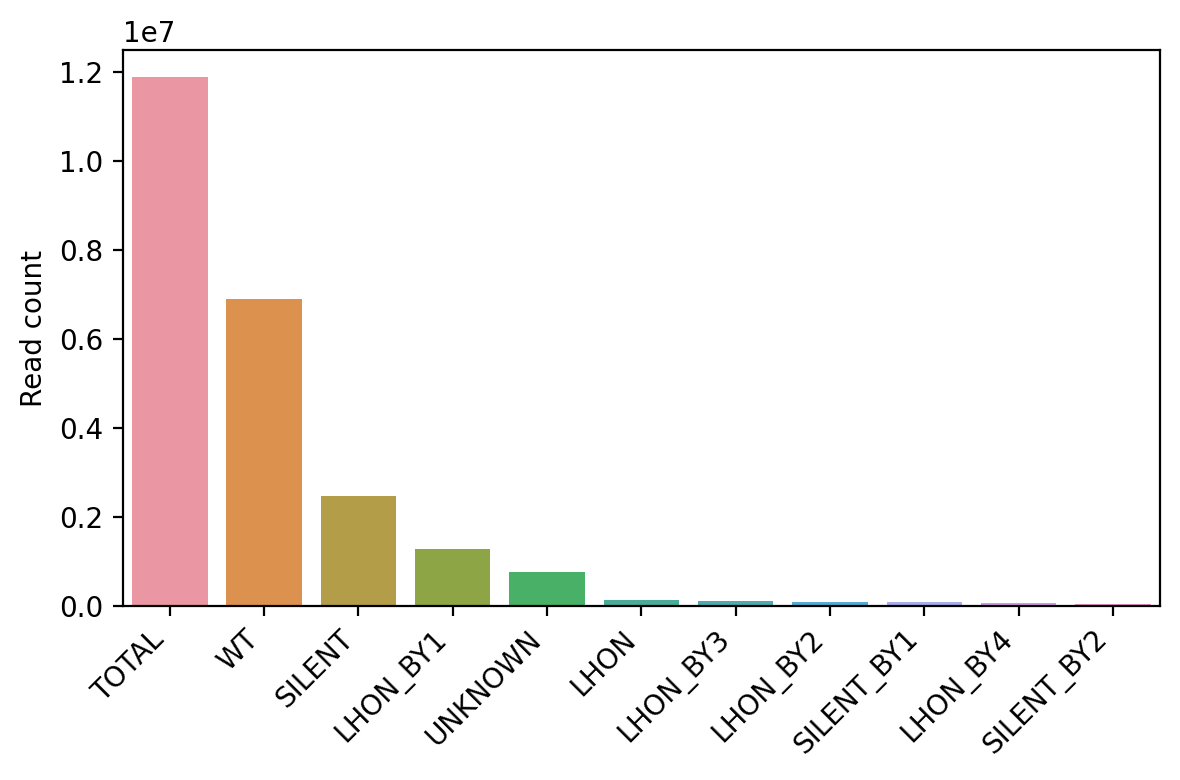

In [4]:
#plot read 1 matches
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(6,4))
seaborn.barplot(data=all_stats, x='edit_type', y='read_count', ax=axes)
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right', fontsize=10)
axes.set_xlabel('')
axes.set_ylabel('Read count')
fig.tight_layout()

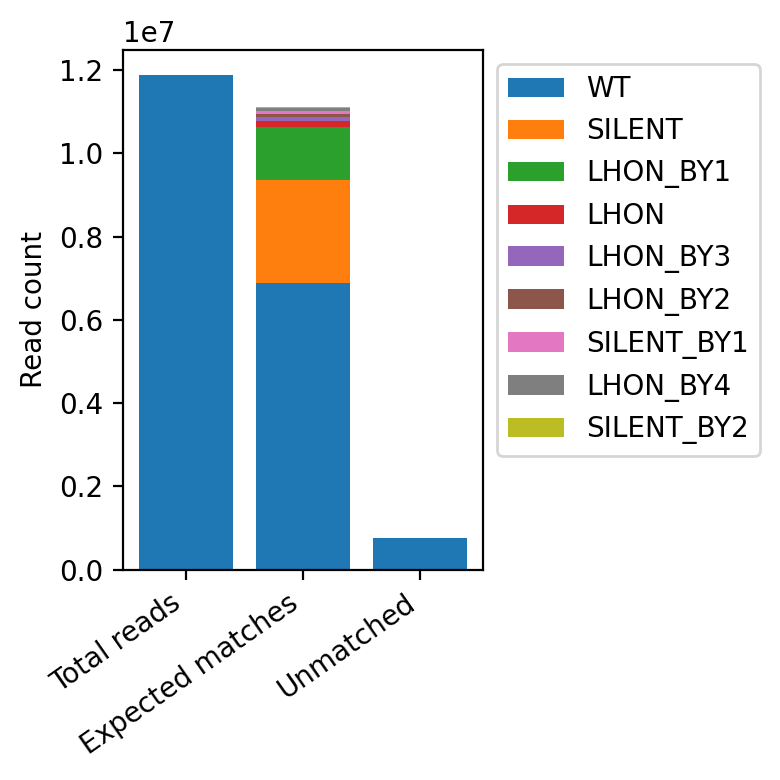

In [5]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(4,4))
axes.bar(x=0, height=all_stats.loc[all_stats['edit_type'] == 'TOTAL', 'read_count'], color='C0')

stacked_indices = ~all_stats['edit_type'].isin(['UNKNOWN', 'TOTAL'])
bottom=0
for r1_name, val in all_stats.loc[stacked_indices].to_numpy():
    axes.bar(x=1, height=val, bottom=bottom, label=r1_name)
    bottom += val

axes.bar(x=2, height=all_stats.loc[all_stats['edit_type'] == 'UNKNOWN', 'read_count'], color='C0')

axes.set_xticks(numpy.arange(3))
axes.set_xticklabels(['Total reads', 'Expected matches', 'Unmatched'], ha='right', rotation=35)
axes.set_ylabel('Read count')
axes.legend(bbox_to_anchor=[1,1])
fig.tight_layout()

### Make plots for the read2 matches

In [6]:
all_stats = drop_dups.groupby('condition')['read_count'].sum()
all_stats['TOTAL'] = all_stats.sum()
order = ['TOTAL', 'UNKNOWN'] + sorted(all_stats.loc[~all_stats.index.isin(['TOTAL', 'UNKNOWN'])].index.values)
all_stats = all_stats.loc[order].rename('read_count').reset_index()
all_stats

condition  read_count
0                 TOTAL    11883915
1               UNKNOWN     4999055
2            d0_lhon_r1      143634
3            d0_lhon_r2      146308
4            d0_lhon_r3      196591
5          d0_silent_r1      260238
6          d0_silent_r2      220869
7          d0_silent_r3      126572
8       d5_high_lhon_r1      159514
9       d5_high_lhon_r2      191347
10      d5_high_lhon_r3      176685
11    d5_high_silent_r1      256625
12    d5_high_silent_r2      320269
13    d5_high_silent_r3      305760
14       d5_low_lhon_r1      216357
15       d5_low_lhon_r3      147897
16     d5_low_silent_r1      306902
17     d5_low_silent_r2      205732
18     d5_low_silent_r3      219215
19       d5_med_lhon_r1      478868
20       d5_med_lhon_r2      506895
21       d5_med_lhon_r3      482356
22    d5_unsort_lhon_r1      258787
23    d5_unsort_lhon_r2      360709
24    d5_unsort_lhon_r3      291066
25  d5_unsort_silent_r1      275515
26  d5_unsort_silent_r2      358604
27  d5_unsort_silent_r3      271545

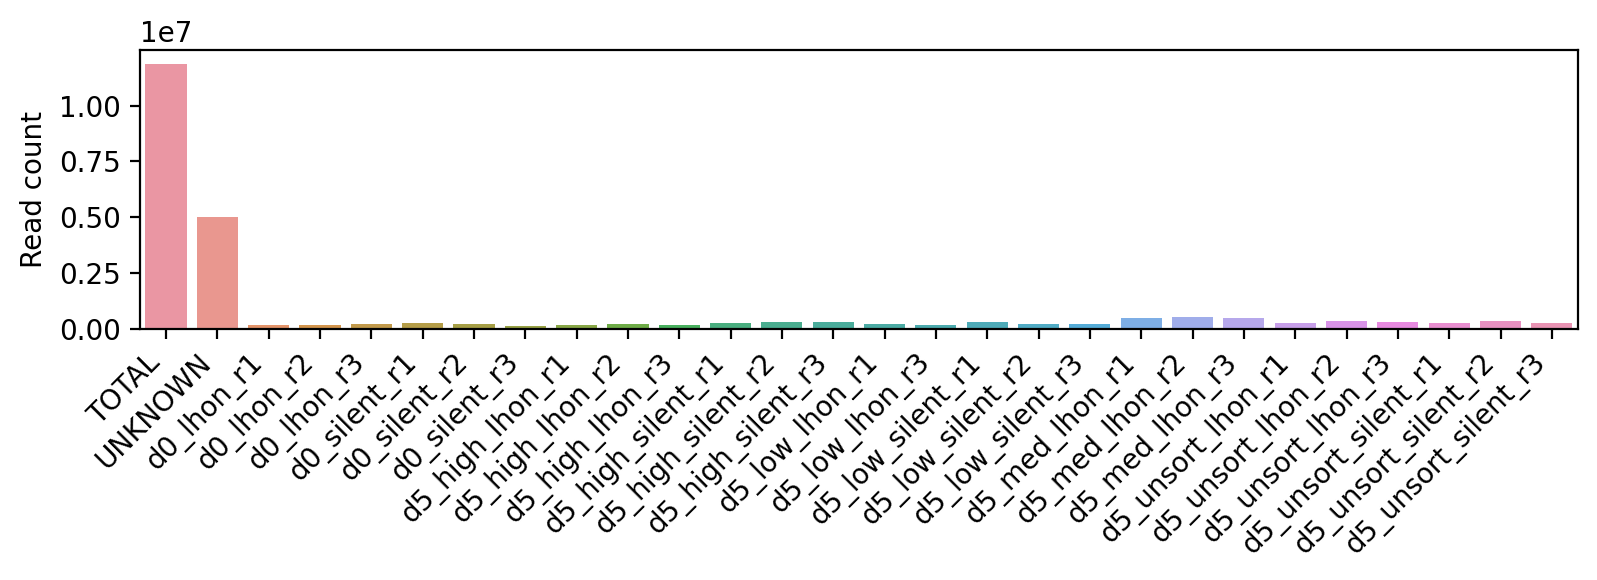

In [7]:
#plot read 2 matches
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(8,3))
seaborn.barplot(data=all_stats, x='condition', y='read_count', ax=axes)
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right', fontsize=10)
axes.set_xlabel('')
axes.set_ylabel('Read count')
fig.tight_layout()

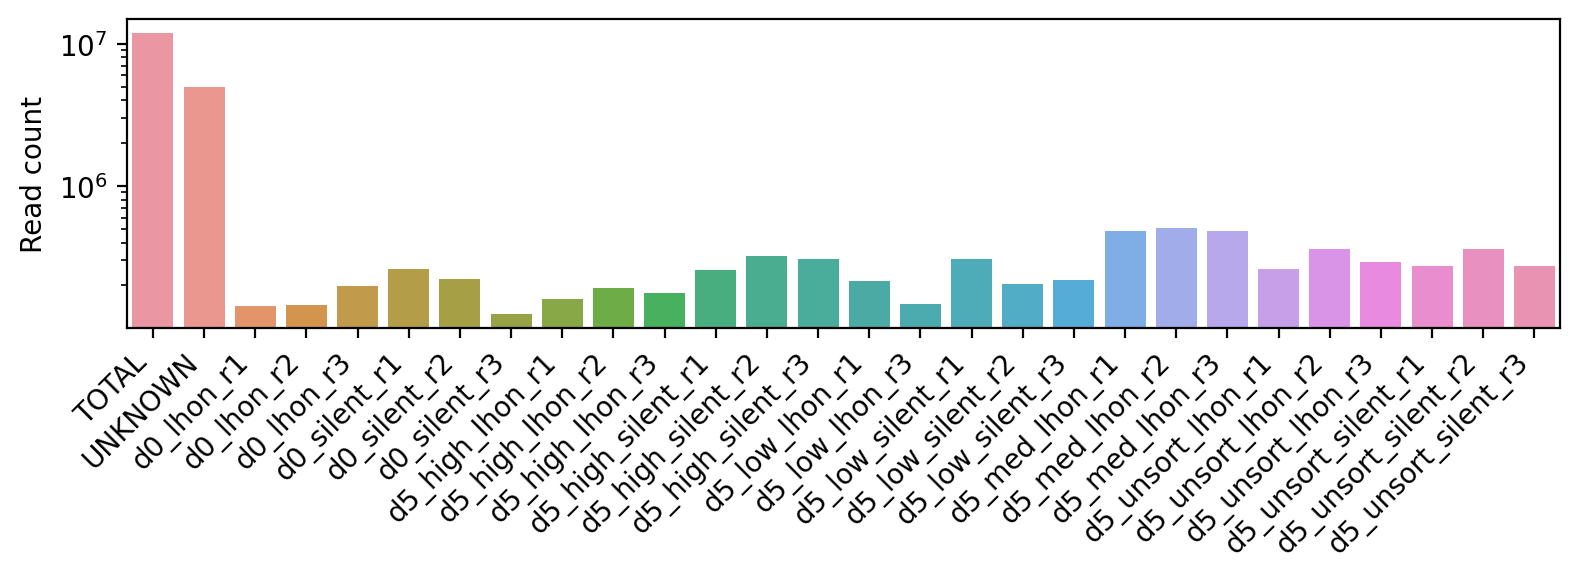

In [8]:
#plot read 2 matches
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(8,3))
seaborn.barplot(data=all_stats, x='condition', y='read_count', ax=axes)
axes.set_yscale('log')
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right', fontsize=10)
axes.set_xlabel('')
axes.set_ylabel('Read count')
fig.tight_layout()

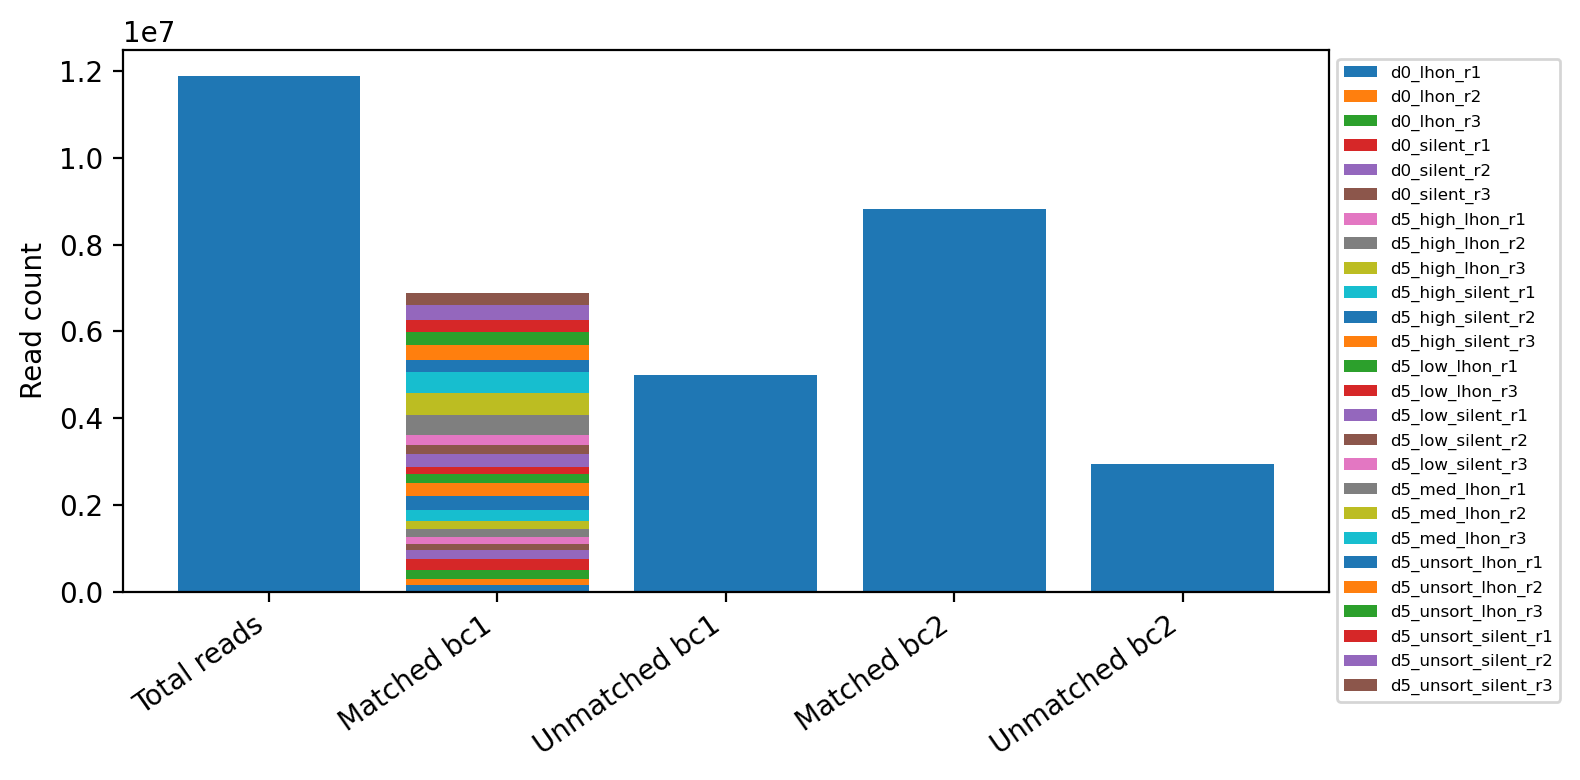

In [9]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(8,4))
axes.bar(x=0, height=all_stats.loc[all_stats['condition'] == 'TOTAL', 'read_count'], color='C0')

stacked_indices = ~all_stats['condition'].isin(['UNKNOWN', 'TOTAL'])
bottom=0
for r1_name, val in all_stats.loc[stacked_indices].to_numpy():
    axes.bar(x=1, height=val, bottom=bottom, label=r1_name)
    bottom += val

axes.bar(x=2, height=all_stats.loc[all_stats['condition'] == 'UNKNOWN', 'read_count'], color='C0')

axes.bar(x=3, height=numpy.sum(drop_dups['bc2_corr'] != 'UNKNOWN'), color='C0')
axes.bar(x=4, height=numpy.sum(drop_dups['bc2_corr'] == 'UNKNOWN'), color='C0')

axes.set_xticks(numpy.arange(5))
axes.set_xticklabels(['Total reads', 'Matched bc1', 'Unmatched bc1', 
                      'Matched bc2', 'Unmatched bc2'], ha='right', rotation=35)
axes.set_ylabel('Read count')
axes.legend(bbox_to_anchor=[1,1], fontsize=6)
fig.tight_layout()

In [10]:
valid_cells = pandas.read_csv('./heteroplasmy_dataframe.csv')
print(valid_cells.shape)
valid_cells.head()

(9978, 13)


cell_id            condition  umi_count  LHON  LHON/SILENT  \
0  A1-CTCAATGA-TAAGGTAA     d5_low_silent_r1         34     0            1   
1  A1-ACACAGAA-GATACGCA    d5_unsort_lhon_r3         37     0            3   
2  A1-AACAACCA-CGTTAGAT    d5_unsort_lhon_r1         30     0            4   
3  A1-ACGTATCA-GCATGCCG  d5_unsort_silent_r2         25     0            3   
4  A1-CCGTGAGA-CCAGGCTT       d5_low_lhon_r1         24     0            2   

   SILENT  WT  umi_count_for_filtering  umi_count_rank  LHON_het  SILENT_het  \
0       2  31                       34            4902  0.029412    0.088235   
1       1  33                       37            4429  0.081081    0.108108   
2       8  18                       30            6043  0.133333    0.400000   
3       7  15                       25            8087  0.120000    0.400000   
4       1  21                       24            8095  0.083333    0.125000   

   SILENT_ONLY_het  total_het  
0         0.058824   0.088235  
1         0.027027   0.108108  
2         0.266667   0.400000  
3         0.280000   0.400000  
4         0.041667   0.125000

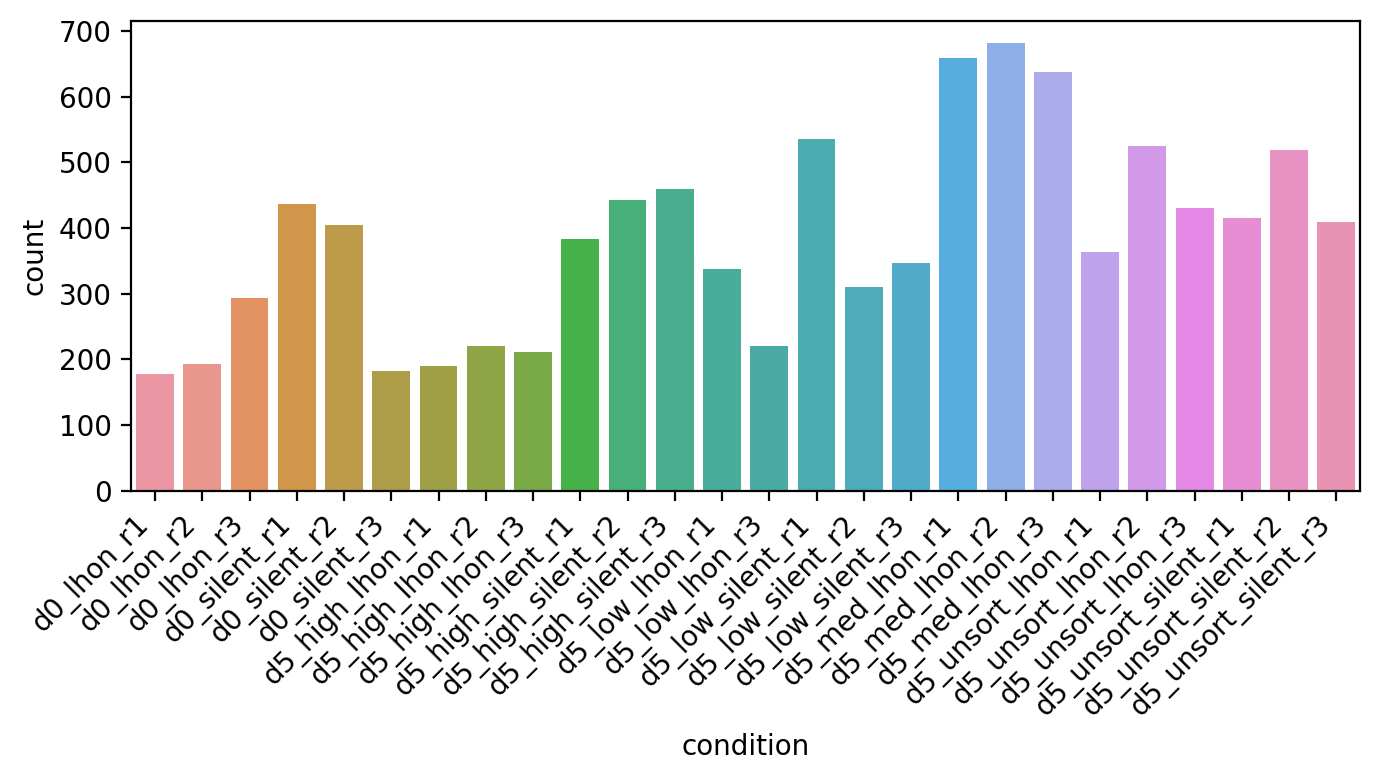

In [11]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(7,4))
xorder = sorted(valid_cells['condition'].unique())
seaborn.countplot(data=valid_cells, x='condition', order=xorder, ax=axes)
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45)
fig.tight_layout()

In [12]:
bulk_estimates = pandas.read_csv('../Bulk_LHON_timeseries/mut_counts.csv')
bulk_estimates['TOTAL_het'] = bulk_estimates[['LHON', 'LHON_BY1', 'LHON_BY2', 'LHON_BY3', 'LHON_BY4',
                                              'SILENT', 'SILENT_BY1', 'SILENT_BY2']].sum(axis=1)/bulk_estimates['TOTAL']
print(bulk_estimates.shape)
bulk_estimates

(72, 19)


sample_id  LHON  LHON_BY1  LHON_BY2  LHON_BY3  LHON_BY4    MUT  SILENT  \
0         A1   111       190        11        12         8      0     534   
1        A10  6390    101575      4285      4758      4678      0  101644   
2        A11  1888     19880      4817      1039      1054      0   43569   
3        A12    80       947        41        40        41      0    1142   
4         A2    11        38         3         3         4      0     153   
5         A3    57        82         3         2         6      0     310   
6         A4    67       154         7        12        10      0     520   
7         A5   131       216         9        16         5      0    1481   
8         A6   157       281         1        19        10      0    3371   
9         A7    62       140        12        12         5      0     416   
10        A8   409       243         5        18         4      0    2707   
11        A9    30        76         0         4         4      0     340   
12        B1   341       483        17        40        11      0   21053   
13       B10    81       269        17        31        12      0     916   
14       B11  1386     10825       780      1285       609      0   17871   
15       B12  1722     11051       628       821       496      0   21635   
16        B2   336       488       192        28        14      0   20311   
17        B3    85       189        21        22        10      0    2409   
18        B4  6286    165698     15446     19788     11901      0   83167   
19        B5  6114    152016     14564     18739     10748      0   79486   
20        B6  5701    140764     16662     25153     12162      0   69995   
21        B7   720      1666        67       173        43      0  244398   
22        B8   575      1042        38        97        30      0  181182   
23        B9   466       894        28        74        23      0  190170   
24        C1   573       326         4        22         5      0   10093   
25       C10   393       272         5         8        11      0   51445   
26       C11   540       296         4        20         2      0   52679   
27       C12   350       234         7        10        11      0   28112   
28        C2   114       110         5         5         3      0    2125   
29        C3   491       237         3         4         6      0   10957   
30        C4  4779     54458      1928      3235      2288      0   90474   
31        C5  5587     70711      2338      4181      2982      0  123057   
32        C6  5235     75393      2891      4888      3495      0  121636   
33        C7  2017     16850       385       586       632      0   31892   
34        C8  2225     23496       620       715       848      0   42396   
35        C9  2163     23226       575       713       830      0   43558   
36        D1   553      4062        98       155       140      0    8904   
37       D10   541       613        11        35        13      0  182086   
38       D11   609       798        10        46        15      0  187402   
39       D12  5534     69935      4121      5387      3524      0   83379   
40        D2   972      8272       166       300       292      0   17881   
41        D3  1815     14652       259       497       504      0   37305   
42        D4  1000       739        13        68        19      0   82856   
43        D5   687       615        17        42        16      0   46946   
44        D6   722       780        28        61        31      0   43519   
45        D7  8789    136233      9618     14860      8604      0  107148   
46        D8  6893    101981      6578     10742      6472      0   90273   
47        D9   466       747        18        56        15      0  236025   
48        E1  4709     51531      2521      3898      2547      0   74597   
49       E10  2436     22975       596      1147       842      0   55377   
50       E11  1609     12848       667       778       563      0   27778   

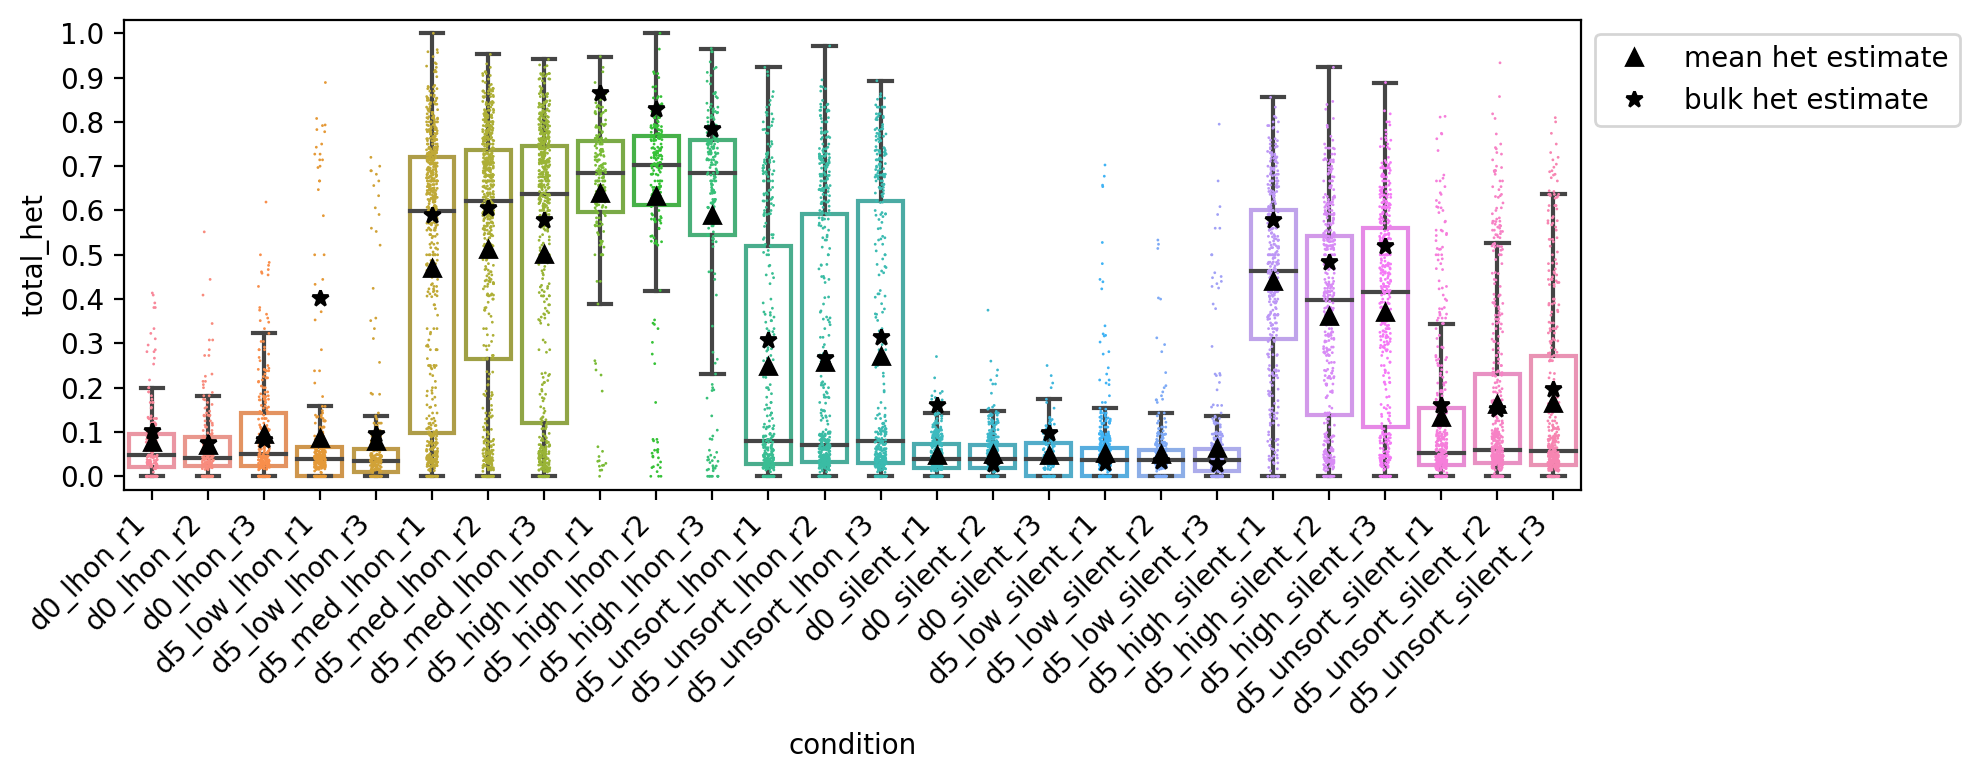

In [13]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(10,4))
xorder = ['d0_lhon_r1', 'd0_lhon_r2', 'd0_lhon_r3',
          'd5_low_lhon_r1', 'd5_low_lhon_r3',
          'd5_med_lhon_r1', 'd5_med_lhon_r2', 'd5_med_lhon_r3',
          'd5_high_lhon_r1', 'd5_high_lhon_r2', 'd5_high_lhon_r3',
          'd5_unsort_lhon_r1', 'd5_unsort_lhon_r2', 'd5_unsort_lhon_r3',
          'd0_silent_r1', 'd0_silent_r2', 'd0_silent_r3',
          'd5_low_silent_r1', 'd5_low_silent_r2', 'd5_low_silent_r3',
          'd5_high_silent_r1', 'd5_high_silent_r2', 'd5_high_silent_r3',
          'd5_unsort_silent_r1', 'd5_unsort_silent_r2', 'd5_unsort_silent_r3']
seaborn.boxplot(data=valid_cells, x='condition', y='total_het', ax=axes, order=xorder, showfliers=False)
seaborn.stripplot(data=valid_cells, x='condition', y='total_het', dodge=True, s=1, order=xorder, ax=axes)
axes.plot(numpy.arange(len(xorder)), valid_cells.groupby('condition')['total_het'].mean()[xorder],
          color='k', marker='^', linestyle='', zorder=100, label='mean het estimate')

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45)
axes.set_ylim((-0.03, 1.03))
axes.set_yticks(numpy.arange(0, 1.1, 0.1))

xpos = numpy.arange(len(xorder))
bulk_hets = []
for sname in xorder:
    bulk_hets.append(bulk_estimates.loc[bulk_estimates['sci-lite_sample'] == sname, 'TOTAL_het'].to_numpy()[0])
axes.plot(xpos, bulk_hets, color='k', marker='*', linestyle='', zorder=100, label='bulk het estimate')
axes.legend(bbox_to_anchor=[1,1])

fig.tight_layout()

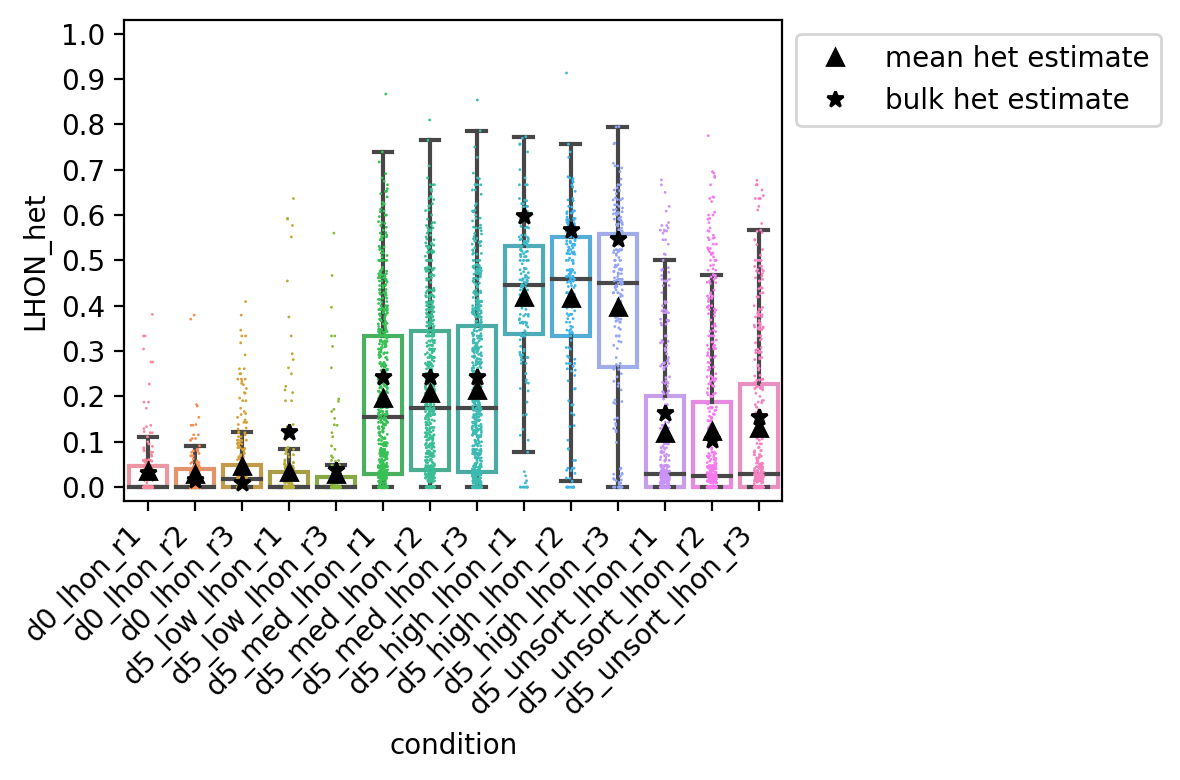

In [14]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(6,4))
xorder = ['d0_lhon_r1', 'd0_lhon_r2', 'd0_lhon_r3',
          'd5_low_lhon_r1', 'd5_low_lhon_r3',
          'd5_med_lhon_r1', 'd5_med_lhon_r2', 'd5_med_lhon_r3',
          'd5_high_lhon_r1', 'd5_high_lhon_r2', 'd5_high_lhon_r3',
          'd5_unsort_lhon_r1', 'd5_unsort_lhon_r2', 'd5_unsort_lhon_r3']
seaborn.boxplot(data=valid_cells, x='condition', y='LHON_het', ax=axes, order=xorder, showfliers=False)
seaborn.stripplot(data=valid_cells, x='condition', y='LHON_het', dodge=True, s=1, order=xorder, ax=axes)
axes.plot(numpy.arange(len(xorder)), valid_cells.groupby('condition')['LHON_het'].mean()[xorder],
          color='k', marker='^', linestyle='', zorder=100, label='mean het estimate')

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45)
axes.set_ylim((-0.03, 1.03))
axes.set_yticks(numpy.arange(0, 1.1, 0.1))

xpos = numpy.arange(len(xorder))
bulk_hets = []
for sname in xorder:
    bulk_hets.append(bulk_estimates.loc[bulk_estimates['sci-lite_sample'] == sname, 'LHON_het'].to_numpy()[0])
axes.plot(xpos, bulk_hets, color='k', marker='*', linestyle='', zorder=100, label='bulk het estimate')
axes.legend(bbox_to_anchor=[1,1])

fig.tight_layout()

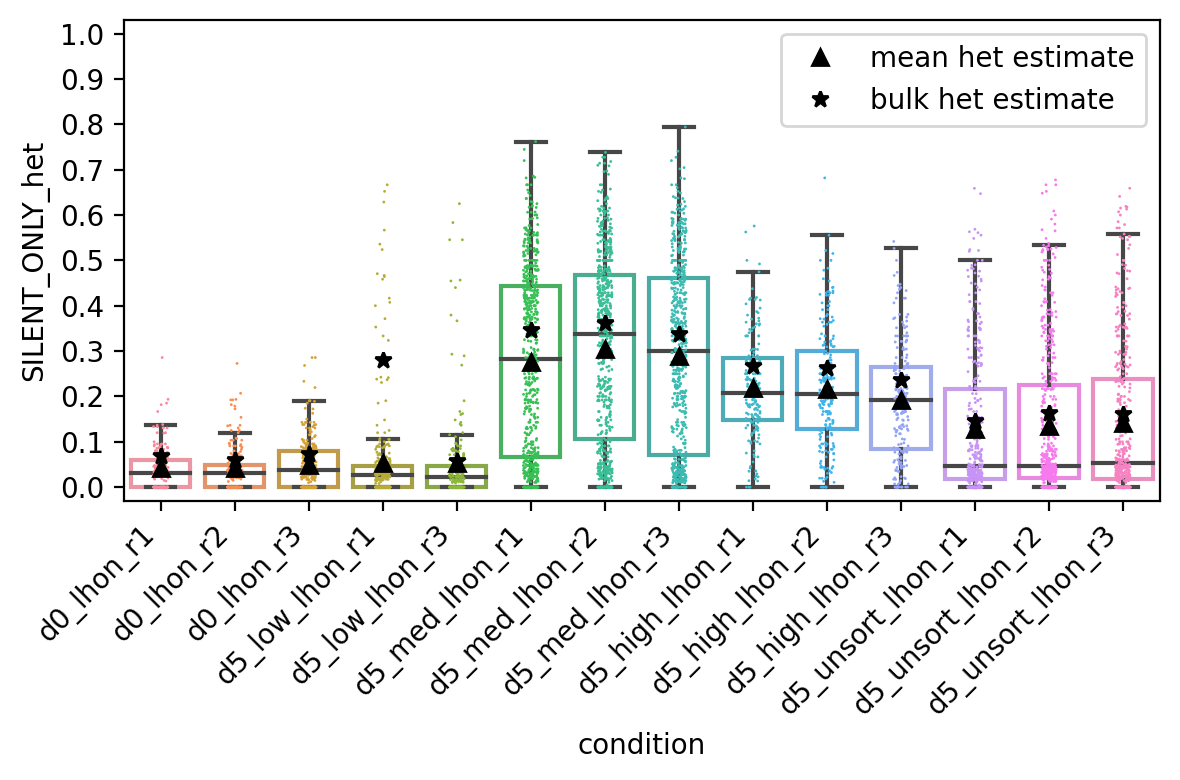

In [15]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(6,4))
xorder = ['d0_lhon_r1', 'd0_lhon_r2', 'd0_lhon_r3',
          'd5_low_lhon_r1', 'd5_low_lhon_r3',
          'd5_med_lhon_r1', 'd5_med_lhon_r2', 'd5_med_lhon_r3',
          'd5_high_lhon_r1', 'd5_high_lhon_r2', 'd5_high_lhon_r3',
          'd5_unsort_lhon_r1', 'd5_unsort_lhon_r2', 'd5_unsort_lhon_r3']
seaborn.boxplot(data=valid_cells, x='condition', y='SILENT_ONLY_het', ax=axes, order=xorder, showfliers=False)
seaborn.stripplot(data=valid_cells, x='condition', y='SILENT_ONLY_het', dodge=True, s=1, order=xorder, ax=axes)
axes.plot(numpy.arange(len(xorder)), valid_cells.groupby('condition')['SILENT_ONLY_het'].mean()[xorder],
          color='k', marker='^', linestyle='', zorder=100, label='mean het estimate')

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45)
axes.set_ylim((-0.03, 1.03))
axes.set_yticks(numpy.arange(0, 1.1, 0.1))

xpos = numpy.arange(len(xorder))
bulk_hets = []
for sname in xorder:
    bulk_hets.append(bulk_estimates.loc[bulk_estimates['sci-lite_sample'] == sname, 'SILENT_het'].to_numpy()[0])
axes.plot(xpos, bulk_hets, color='k', marker='*', linestyle='', zorder=100, label='bulk het estimate')
axes.legend(bbox_to_anchor=[1,1])

fig.tight_layout()

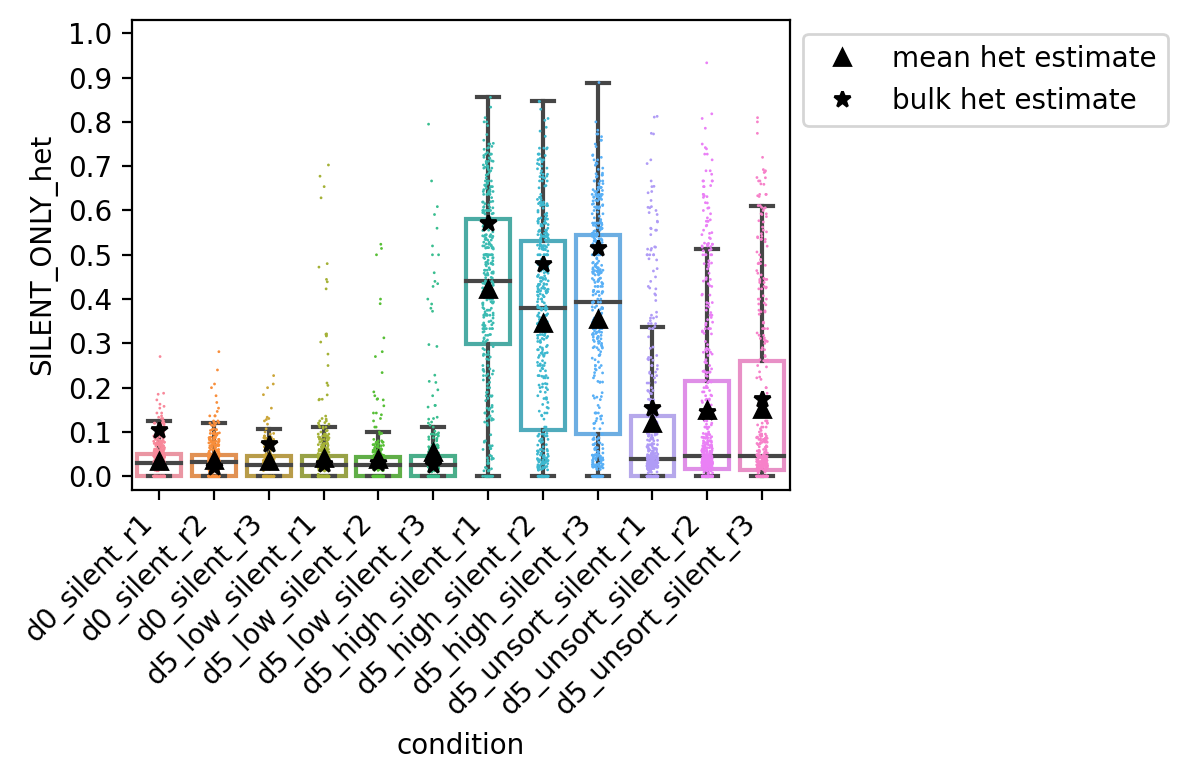

In [16]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(6,4))
xorder = ['d0_silent_r1', 'd0_silent_r2', 'd0_silent_r3',
          'd5_low_silent_r1', 'd5_low_silent_r2', 'd5_low_silent_r3',
          'd5_high_silent_r1', 'd5_high_silent_r2', 'd5_high_silent_r3',
          'd5_unsort_silent_r1', 'd5_unsort_silent_r2', 'd5_unsort_silent_r3']
seaborn.boxplot(data=valid_cells, x='condition', y='SILENT_ONLY_het', ax=axes, order=xorder, showfliers=False)
seaborn.stripplot(data=valid_cells, x='condition', y='SILENT_ONLY_het', dodge=True, s=1, order=xorder, ax=axes)
axes.plot(numpy.arange(len(xorder)), valid_cells.groupby('condition')['SILENT_ONLY_het'].mean()[xorder],
          color='k', marker='^', linestyle='', zorder=100, label='mean het estimate')

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45)
axes.set_ylim((-0.03, 1.03))
axes.set_yticks(numpy.arange(0, 1.1, 0.1))

xpos = numpy.arange(len(xorder))
bulk_hets = []
for sname in xorder:
    bulk_hets.append(bulk_estimates.loc[bulk_estimates['sci-lite_sample'] == sname, 'SILENT_het'].to_numpy()[0])
axes.plot(xpos, bulk_hets, color='k', marker='*', linestyle='', zorder=100, label='bulk het estimate')
axes.legend(bbox_to_anchor=[1,1])

fig.tight_layout()

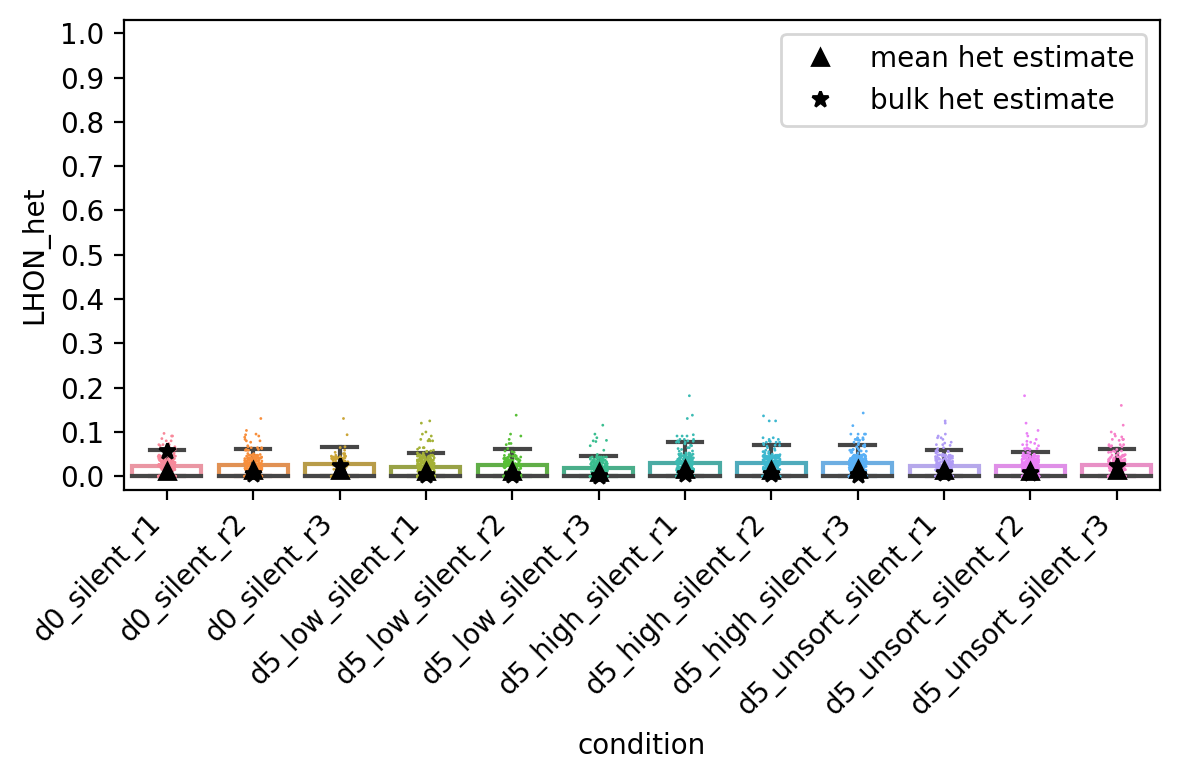

In [17]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(6,4))
xorder = ['d0_silent_r1', 'd0_silent_r2', 'd0_silent_r3',
          'd5_low_silent_r1', 'd5_low_silent_r2', 'd5_low_silent_r3',
          'd5_high_silent_r1', 'd5_high_silent_r2', 'd5_high_silent_r3',
          'd5_unsort_silent_r1', 'd5_unsort_silent_r2', 'd5_unsort_silent_r3']
seaborn.boxplot(data=valid_cells, x='condition', y='LHON_het', ax=axes, order=xorder, showfliers=False)
seaborn.stripplot(data=valid_cells, x='condition', y='LHON_het', dodge=True, s=1, order=xorder, ax=axes)
axes.plot(numpy.arange(len(xorder)), valid_cells.groupby('condition')['LHON_het'].mean()[xorder],
          color='k', marker='^', linestyle='', zorder=100, label='mean het estimate')

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45)
axes.set_ylim((-0.03, 1.03))
axes.set_yticks(numpy.arange(0, 1.1, 0.1))

xpos = numpy.arange(len(xorder))
bulk_hets = []
for sname in xorder:
    bulk_hets.append(bulk_estimates.loc[bulk_estimates['sci-lite_sample'] == sname, 'LHON_het'].to_numpy()[0])
axes.plot(xpos, bulk_hets, color='k', marker='*', linestyle='', zorder=100, label='bulk het estimate')
axes.legend(bbox_to_anchor=[1,1])

fig.tight_layout()

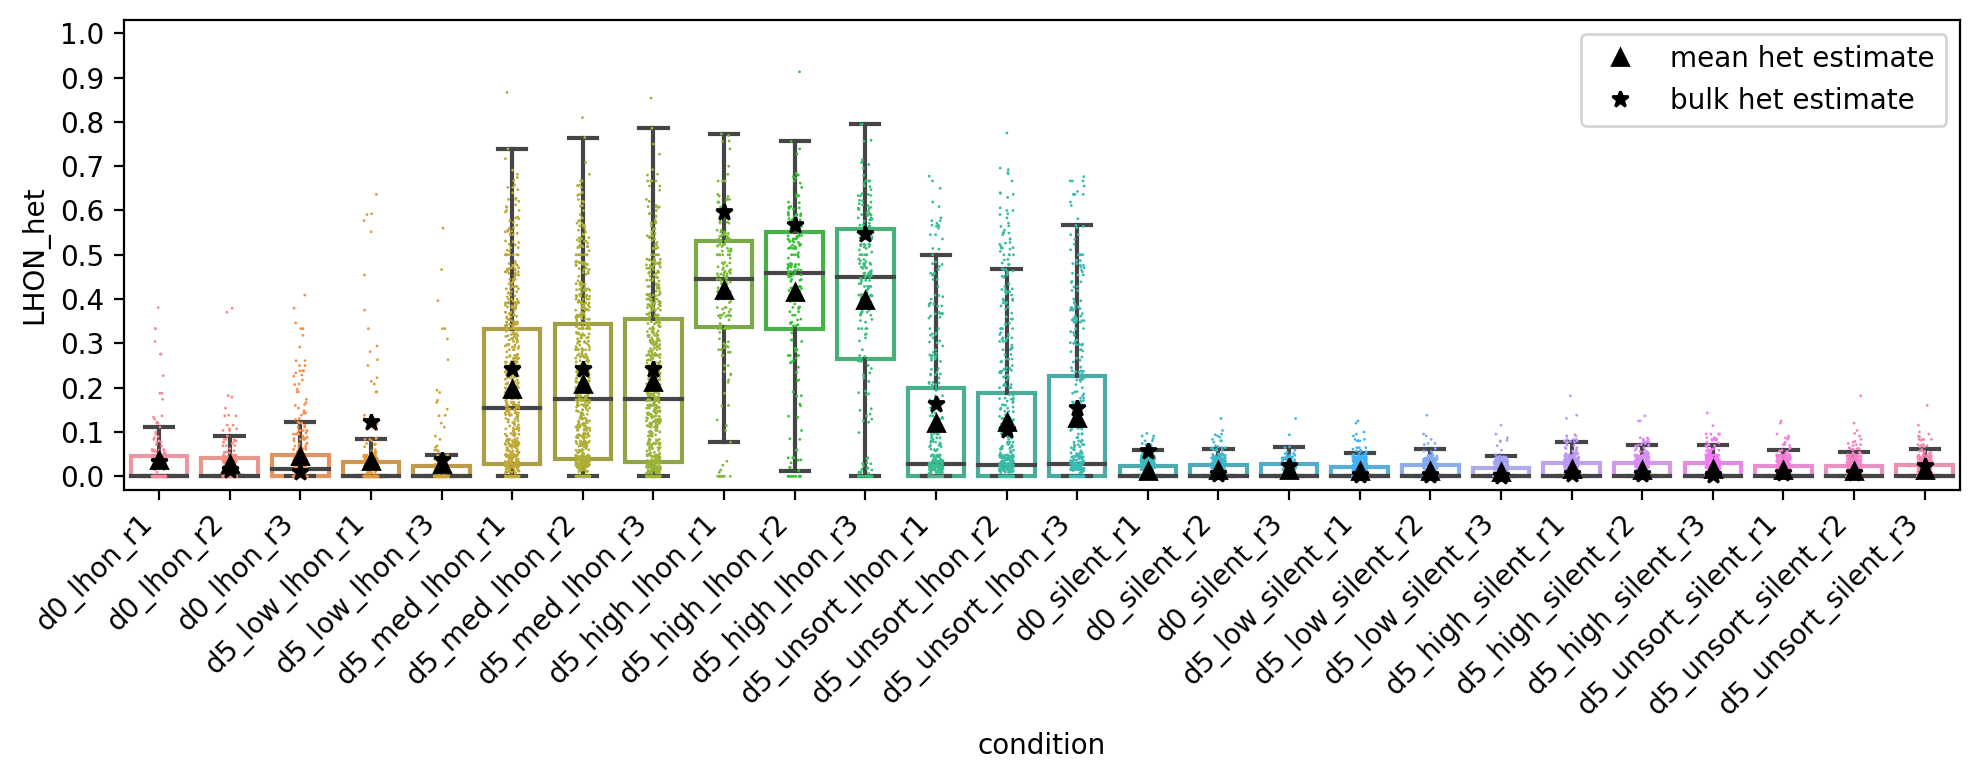

In [18]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(10,4))
xorder = ['d0_lhon_r1', 'd0_lhon_r2', 'd0_lhon_r3',
          'd5_low_lhon_r1', 'd5_low_lhon_r3',
          'd5_med_lhon_r1', 'd5_med_lhon_r2', 'd5_med_lhon_r3',
          'd5_high_lhon_r1', 'd5_high_lhon_r2', 'd5_high_lhon_r3',
          'd5_unsort_lhon_r1', 'd5_unsort_lhon_r2', 'd5_unsort_lhon_r3',
          'd0_silent_r1', 'd0_silent_r2', 'd0_silent_r3',
          'd5_low_silent_r1', 'd5_low_silent_r2', 'd5_low_silent_r3',
          'd5_high_silent_r1', 'd5_high_silent_r2', 'd5_high_silent_r3',
          'd5_unsort_silent_r1', 'd5_unsort_silent_r2', 'd5_unsort_silent_r3']
seaborn.boxplot(data=valid_cells, x='condition', y='LHON_het', ax=axes, order=xorder, showfliers=False)
seaborn.stripplot(data=valid_cells, x='condition', y='LHON_het', dodge=True, s=1, order=xorder, ax=axes)
axes.plot(numpy.arange(len(xorder)), valid_cells.groupby('condition')['LHON_het'].mean()[xorder],
          color='k', marker='^', linestyle='', zorder=100, label='mean het estimate')

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45)
axes.set_ylim((-0.03, 1.03))
axes.set_yticks(numpy.arange(0, 1.1, 0.1))

xpos = numpy.arange(len(xorder))
bulk_hets = []
for sname in xorder:
    bulk_hets.append(bulk_estimates.loc[bulk_estimates['sci-lite_sample'] == sname, 'LHON_het'].to_numpy()[0])
axes.plot(xpos, bulk_hets, color='k', marker='*', linestyle='', zorder=100, label='bulk het estimate')
axes.legend(bbox_to_anchor=[1,1])

fig.tight_layout()

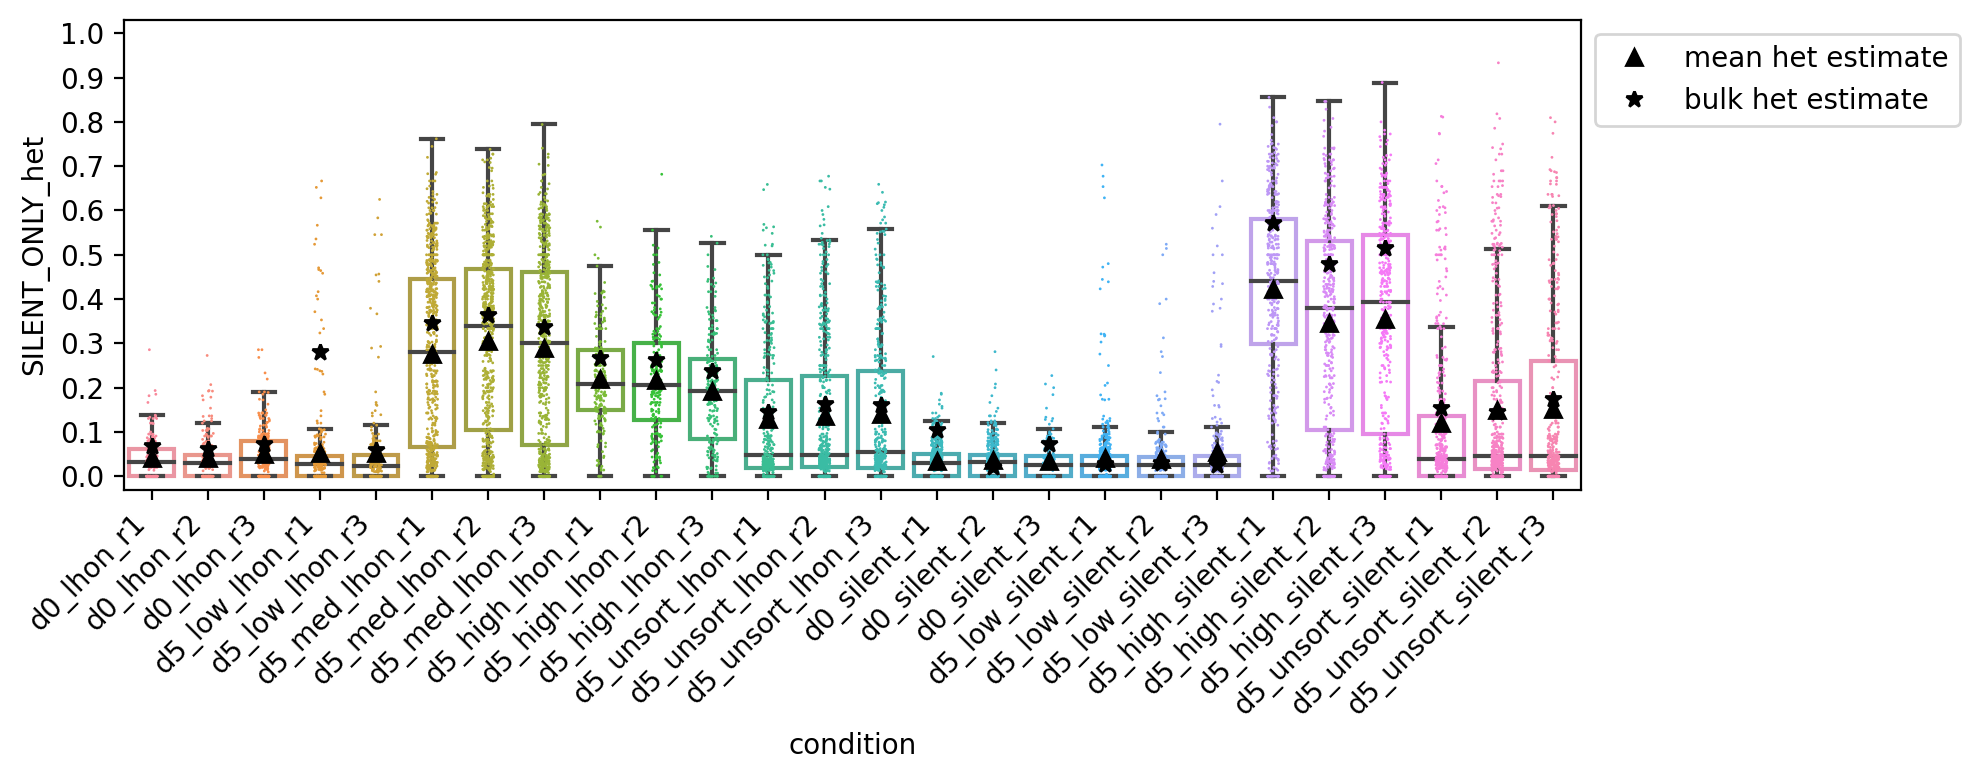

In [19]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(10,4))
xorder = ['d0_lhon_r1', 'd0_lhon_r2', 'd0_lhon_r3',
          'd5_low_lhon_r1', 'd5_low_lhon_r3',
          'd5_med_lhon_r1', 'd5_med_lhon_r2', 'd5_med_lhon_r3',
          'd5_high_lhon_r1', 'd5_high_lhon_r2', 'd5_high_lhon_r3',
          'd5_unsort_lhon_r1', 'd5_unsort_lhon_r2', 'd5_unsort_lhon_r3',
          'd0_silent_r1', 'd0_silent_r2', 'd0_silent_r3',
          'd5_low_silent_r1', 'd5_low_silent_r2', 'd5_low_silent_r3',
          'd5_high_silent_r1', 'd5_high_silent_r2', 'd5_high_silent_r3',
          'd5_unsort_silent_r1', 'd5_unsort_silent_r2', 'd5_unsort_silent_r3']
seaborn.boxplot(data=valid_cells, x='condition', y='SILENT_ONLY_het', ax=axes, order=xorder, showfliers=False)
seaborn.stripplot(data=valid_cells, x='condition', y='SILENT_ONLY_het', dodge=True, s=1, order=xorder, ax=axes)
axes.plot(numpy.arange(len(xorder)), valid_cells.groupby('condition')['SILENT_ONLY_het'].mean()[xorder],
          color='k', marker='^', linestyle='', zorder=100, label='mean het estimate')

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45)
axes.set_ylim((-0.03, 1.03))
axes.set_yticks(numpy.arange(0, 1.1, 0.1))

xpos = numpy.arange(len(xorder))
bulk_hets = []
for sname in xorder:
    bulk_hets.append(bulk_estimates.loc[bulk_estimates['sci-lite_sample'] == sname, 'SILENT_het'].to_numpy()[0])
axes.plot(xpos, bulk_hets, color='k', marker='*', linestyle='', zorder=100, label='bulk het estimate')
axes.legend(bbox_to_anchor=[1,1])

fig.tight_layout()

In [20]:
valid_cells['condition_no_rep'] = valid_cells['condition'].str.split('_r', expand=True)[0]

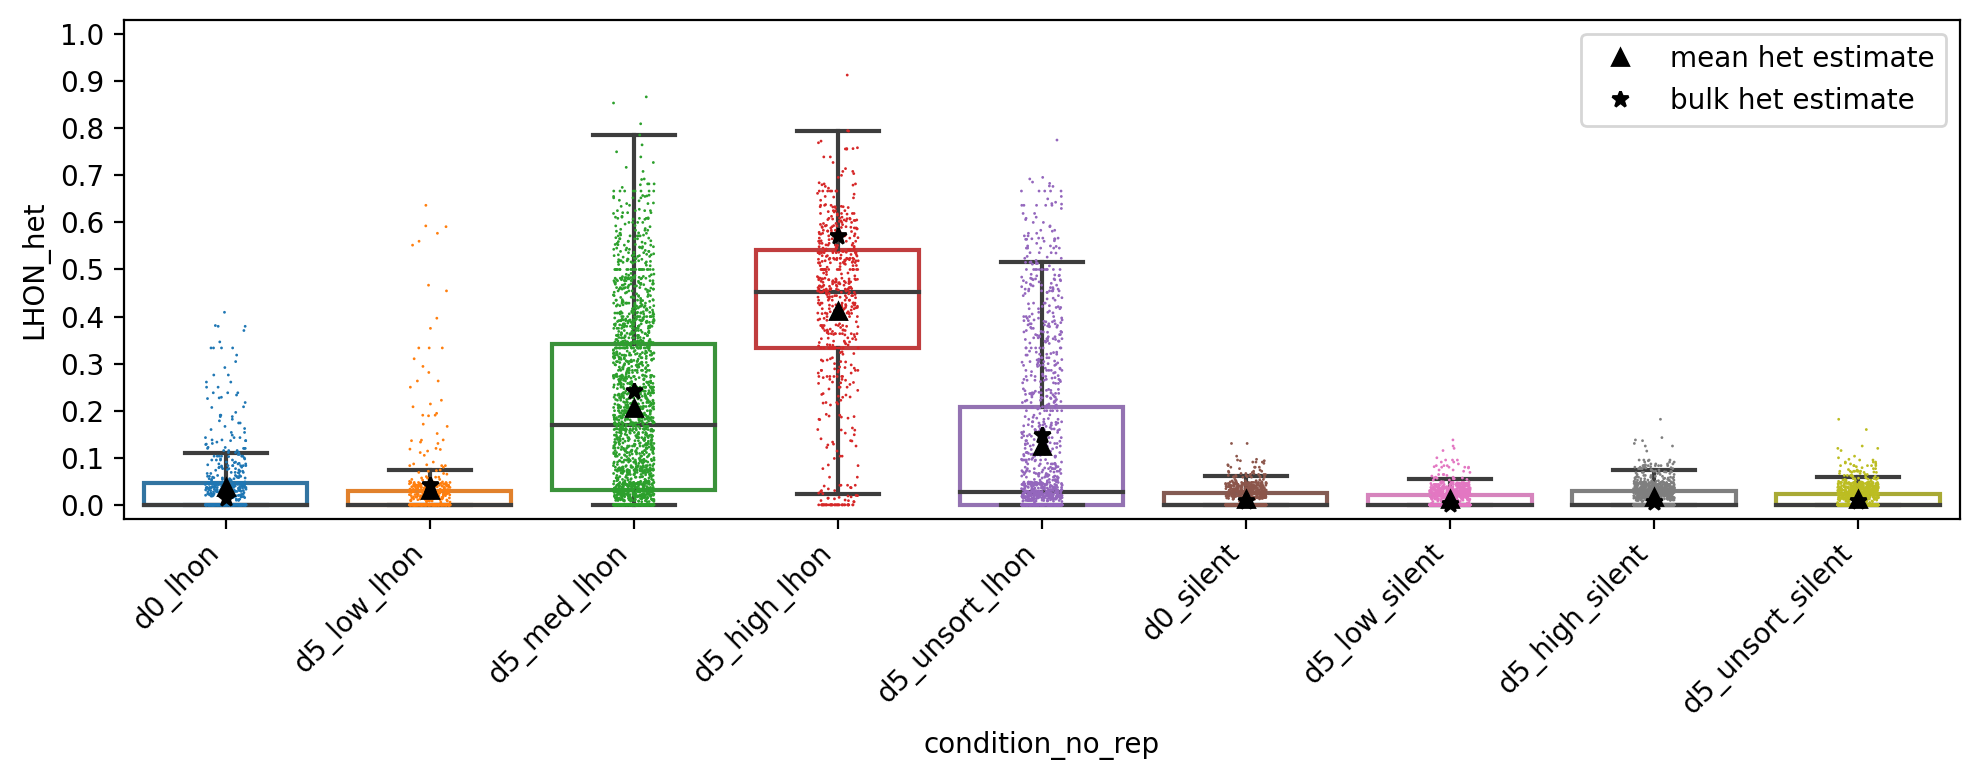

In [21]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(10,4))
xorder = ['d0_lhon', 'd5_low_lhon', 'd5_med_lhon', 'd5_high_lhon', 'd5_unsort_lhon',
          'd0_silent', 'd5_low_silent', 'd5_high_silent', 'd5_unsort_silent']
seaborn.boxplot(data=valid_cells, x='condition_no_rep', y='LHON_het', ax=axes, order=xorder, showfliers=False)
seaborn.stripplot(data=valid_cells, x='condition_no_rep', y='LHON_het', dodge=True, s=1, order=xorder, ax=axes)
axes.plot(numpy.arange(len(xorder)), valid_cells.groupby('condition_no_rep')['LHON_het'].mean()[xorder],
          color='k', marker='^', linestyle='', zorder=100, label='mean het estimate')

xpos = numpy.arange(len(xorder))
bulk_hets = []
for sname in xorder:
    sidx = bulk_estimates['sci-lite_sample'].str.startswith(sname)
    bulk_hets.append(bulk_estimates.loc[sidx, ['LHON', 'LHON_BY1', 'LHON_BY2', 
                                               'LHON_BY3', 'LHON_BY4']].to_numpy().sum()
                     / bulk_estimates.loc[sidx, 'TOTAL'].to_numpy().sum())
axes.plot(xpos, bulk_hets, color='k', marker='*', linestyle='', zorder=100, label='bulk het estimate')

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45)
axes.set_ylim((-0.03, 1.03))
axes.set_yticks(numpy.arange(0, 1.1, 0.1))
axes.legend(bbox_to_anchor=[1,1])

fig.tight_layout()

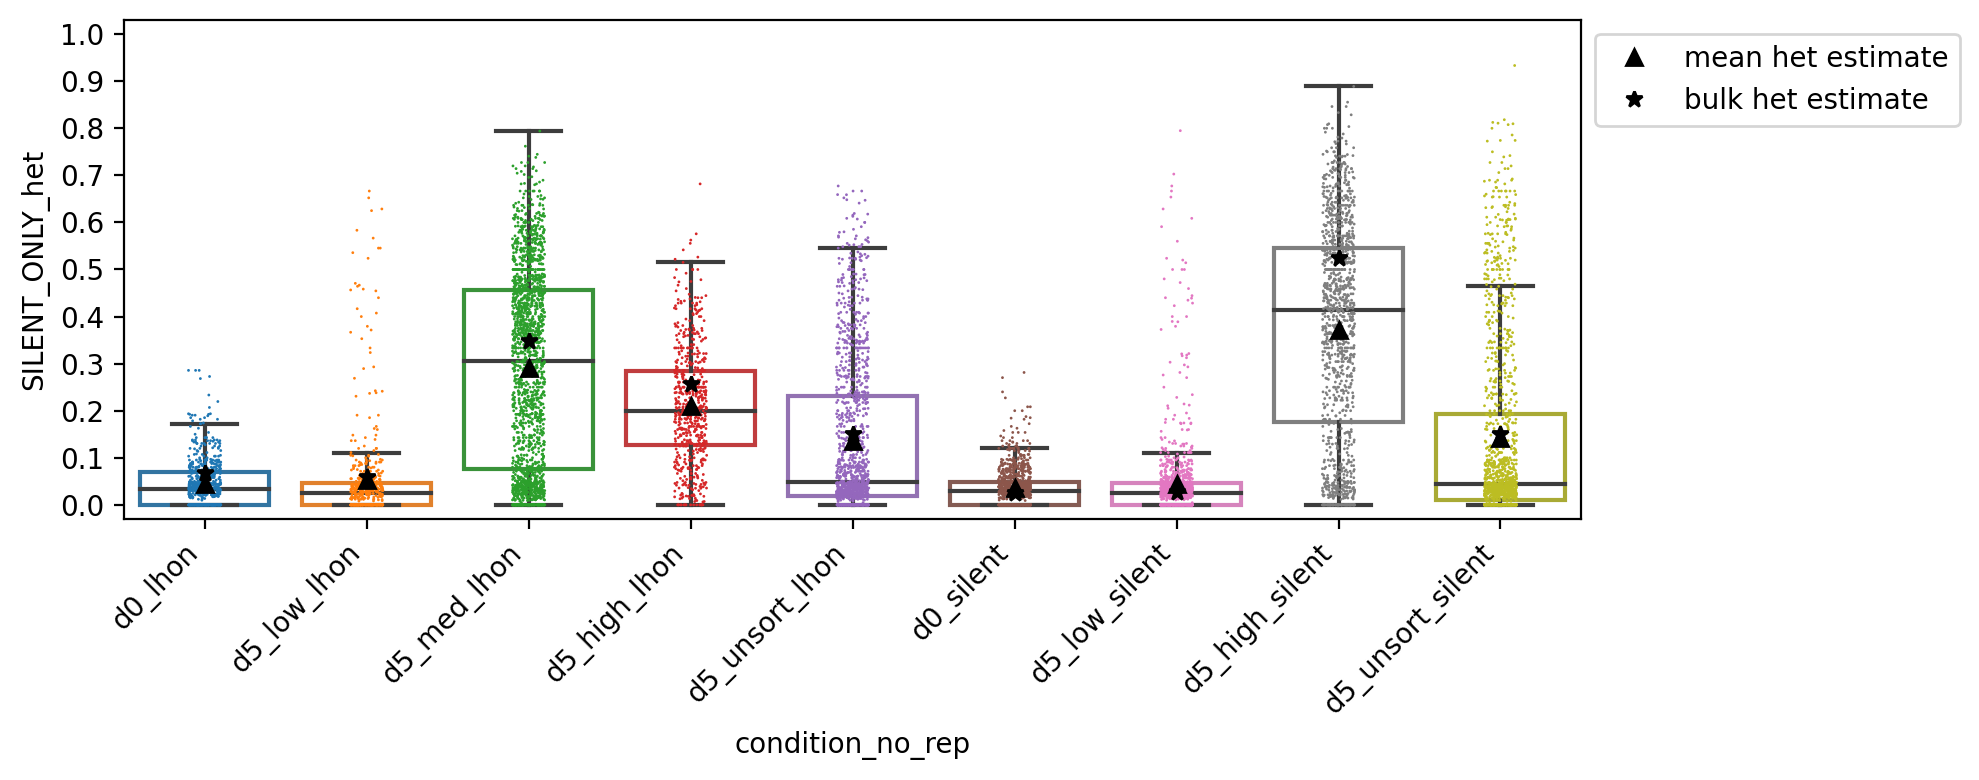

In [22]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(10,4))
xorder = ['d0_lhon', 'd5_low_lhon', 'd5_med_lhon', 'd5_high_lhon', 'd5_unsort_lhon',
          'd0_silent', 'd5_low_silent', 'd5_high_silent', 'd5_unsort_silent']
seaborn.boxplot(data=valid_cells, x='condition_no_rep', y='SILENT_ONLY_het', ax=axes, order=xorder, showfliers=False)
seaborn.stripplot(data=valid_cells, x='condition_no_rep', y='SILENT_ONLY_het', dodge=True, s=1, order=xorder, ax=axes)
axes.plot(numpy.arange(len(xorder)), valid_cells.groupby('condition_no_rep')['SILENT_ONLY_het'].mean()[xorder],
          color='k', marker='^', linestyle='', zorder=100, label='mean het estimate')

xpos = numpy.arange(len(xorder))
bulk_hets = []
for sname in xorder:
    sidx = bulk_estimates['sci-lite_sample'].str.startswith(sname)
    bulk_hets.append(bulk_estimates.loc[sidx, ['SILENT', 'SILENT_BY1', 'SILENT_BY2']].to_numpy().sum()
                     / bulk_estimates.loc[sidx, 'TOTAL'].to_numpy().sum())
axes.plot(xpos, bulk_hets, color='k', marker='*', linestyle='', zorder=100, label='bulk het estimate')

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45)
axes.set_ylim((-0.03, 1.03))
axes.set_yticks(numpy.arange(0, 1.1, 0.1))
axes.legend(bbox_to_anchor=[1,1])

fig.tight_layout()

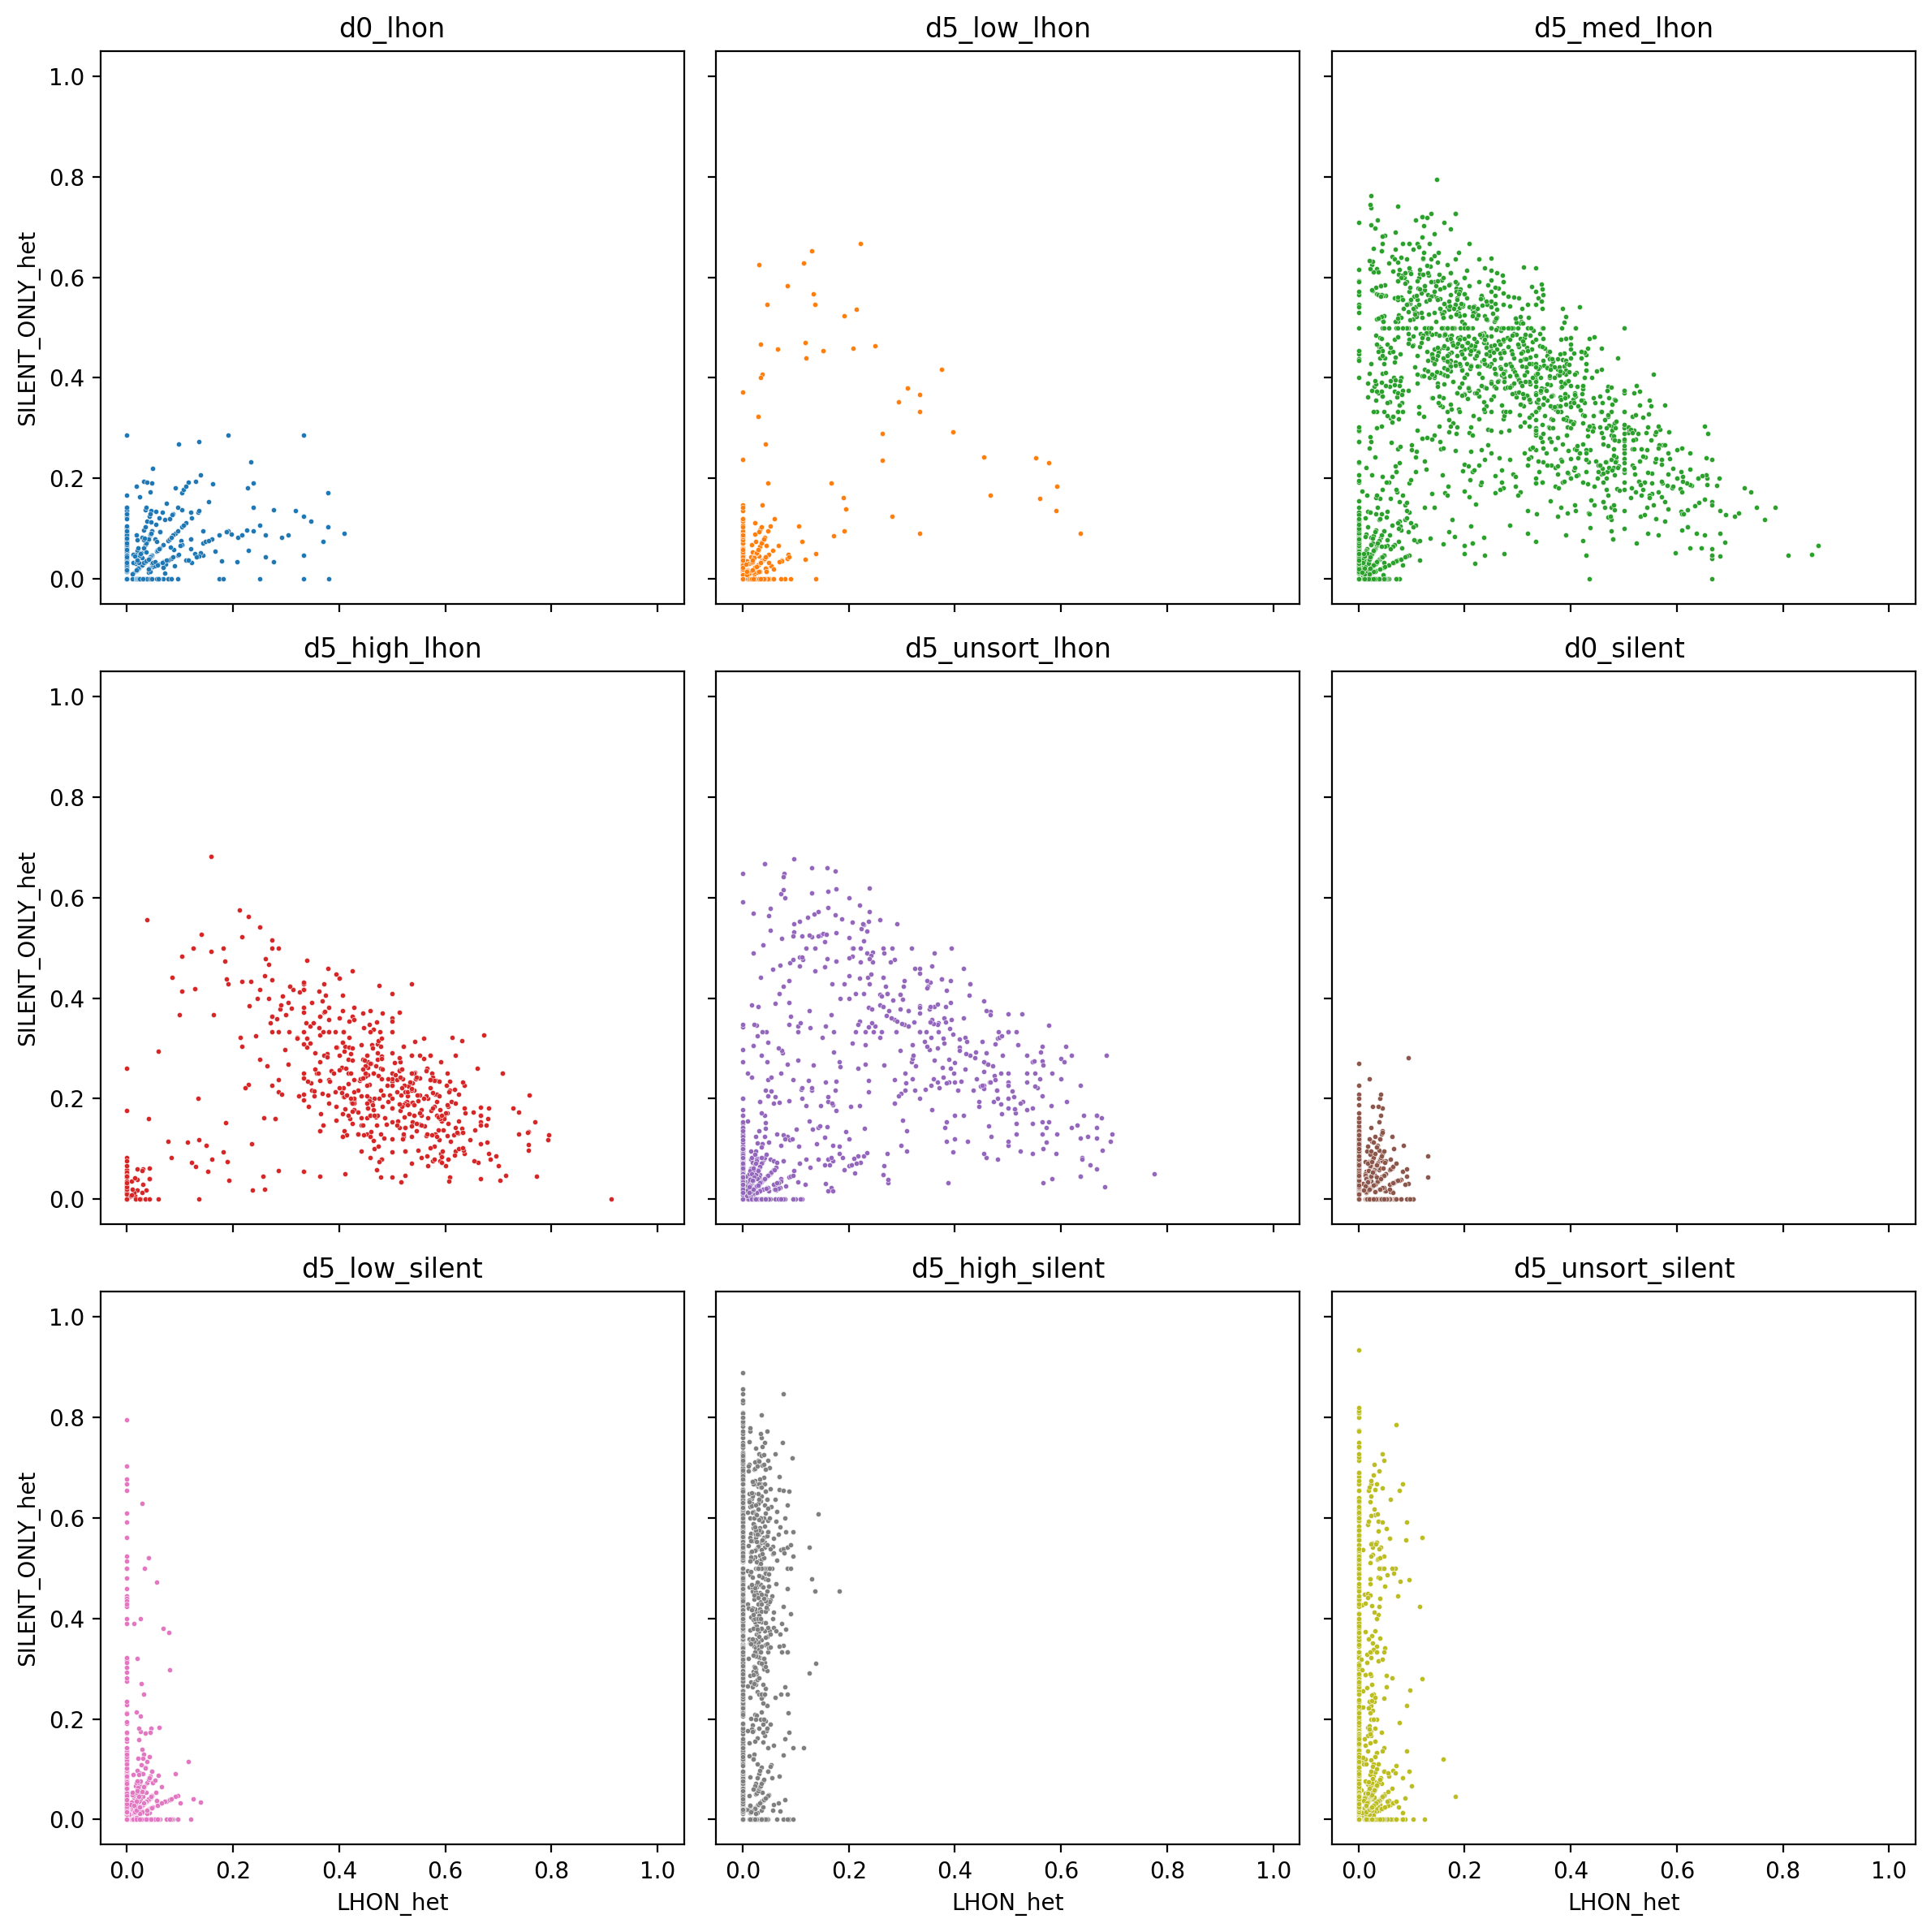

In [23]:
fig, axes = pyplot.subplots(nrows=3, ncols=3, figsize=(12,12), sharey=True, sharex=True)
xorder = ['d0_lhon', 'd5_low_lhon', 'd5_med_lhon', 'd5_high_lhon', 'd5_unsort_lhon',
          'd0_silent', 'd5_low_silent', 'd5_high_silent', 'd5_unsort_silent']
for idx, cond in enumerate(xorder):
    ax_idx = (idx//3, idx%3)
    seaborn.scatterplot(data=valid_cells.loc[valid_cells['condition_no_rep'] == cond], 
                        x='LHON_het', y='SILENT_ONLY_het', color=f'C{idx}', s=5, ax=axes[ax_idx])
    axes[ax_idx].set_xlim((-0.05, 1.05))
    axes[ax_idx].set_ylim((-0.05, 1.05))
    axes[ax_idx].set_title(cond)
fig.tight_layout()

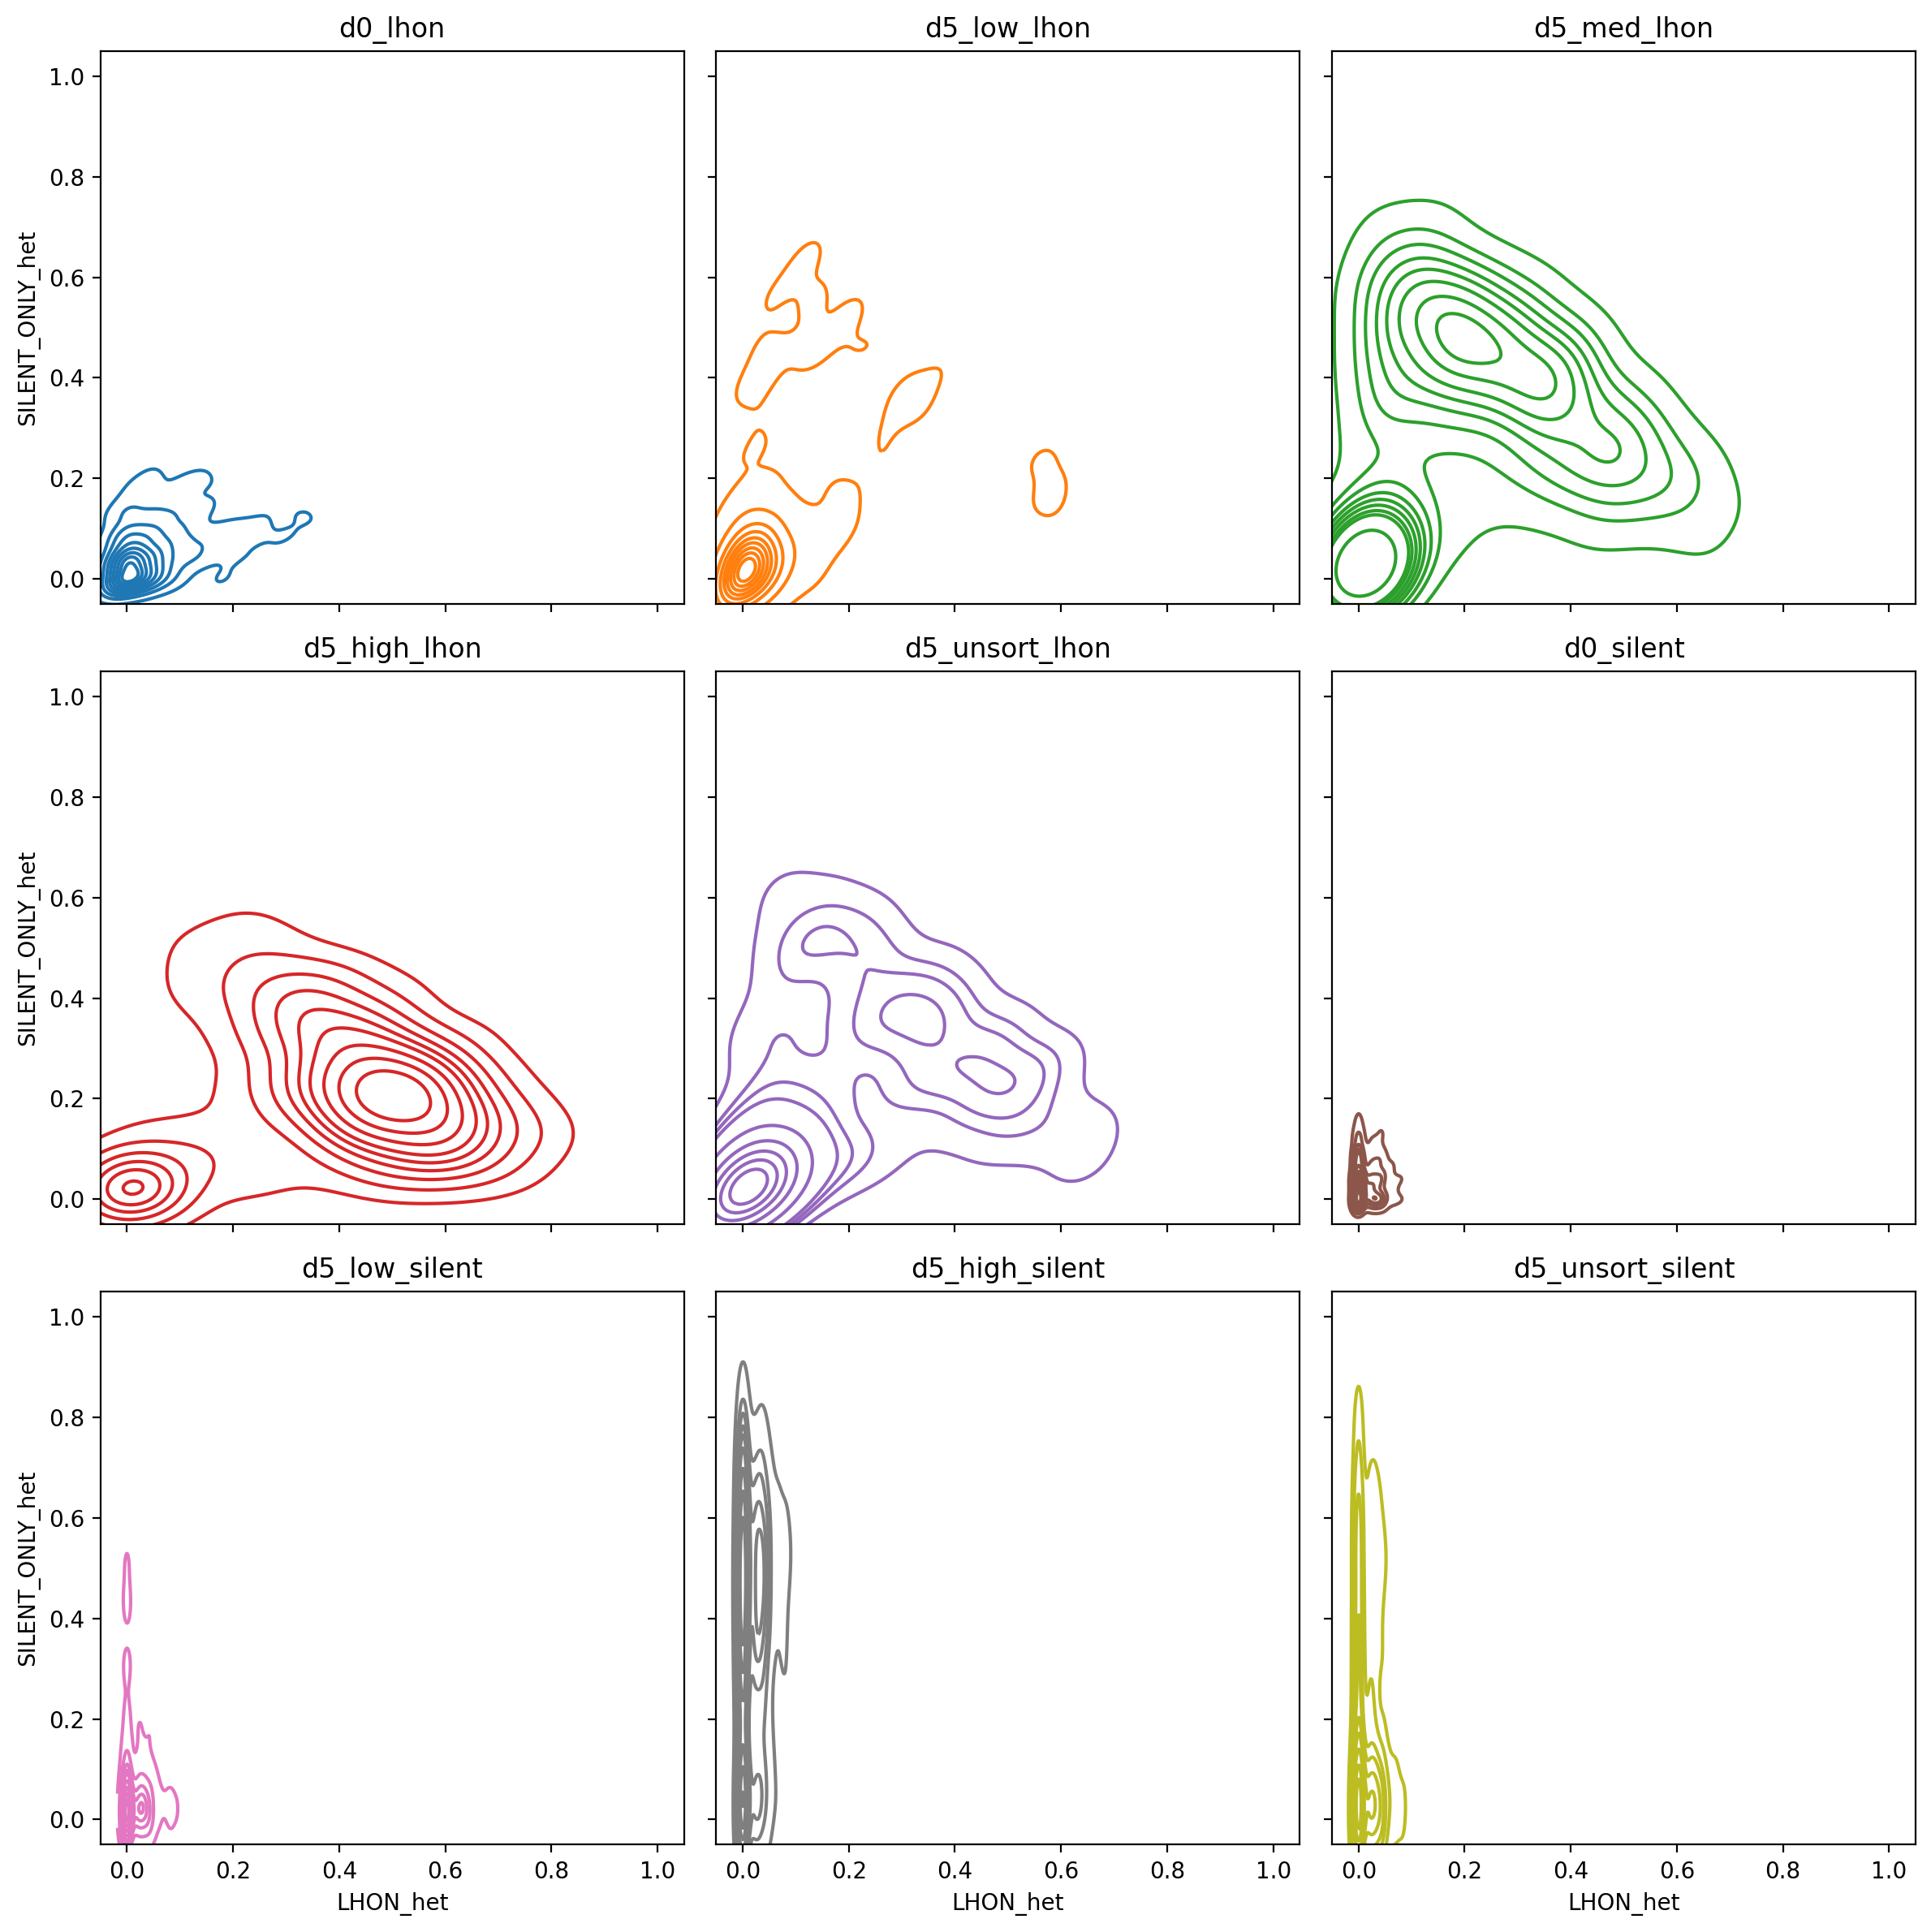

In [24]:
fig, axes = pyplot.subplots(nrows=3, ncols=3, figsize=(12,12), sharey=True, sharex=True)
xorder = ['d0_lhon', 'd5_low_lhon', 'd5_med_lhon', 'd5_high_lhon', 'd5_unsort_lhon',
          'd0_silent', 'd5_low_silent', 'd5_high_silent', 'd5_unsort_silent']
for idx, cond in enumerate(xorder):
    ax_idx = (idx//3, idx%3)
    seaborn.kdeplot(data=valid_cells.loc[valid_cells['condition_no_rep'] == cond], 
                    x='LHON_het', y='SILENT_ONLY_het', color=f'C{idx}', ax=axes[ax_idx])
    axes[ax_idx].set_xlim((-0.05, 1.05))
    axes[ax_idx].set_ylim((-0.05, 1.05))
    axes[ax_idx].set_title(cond)
fig.tight_layout()

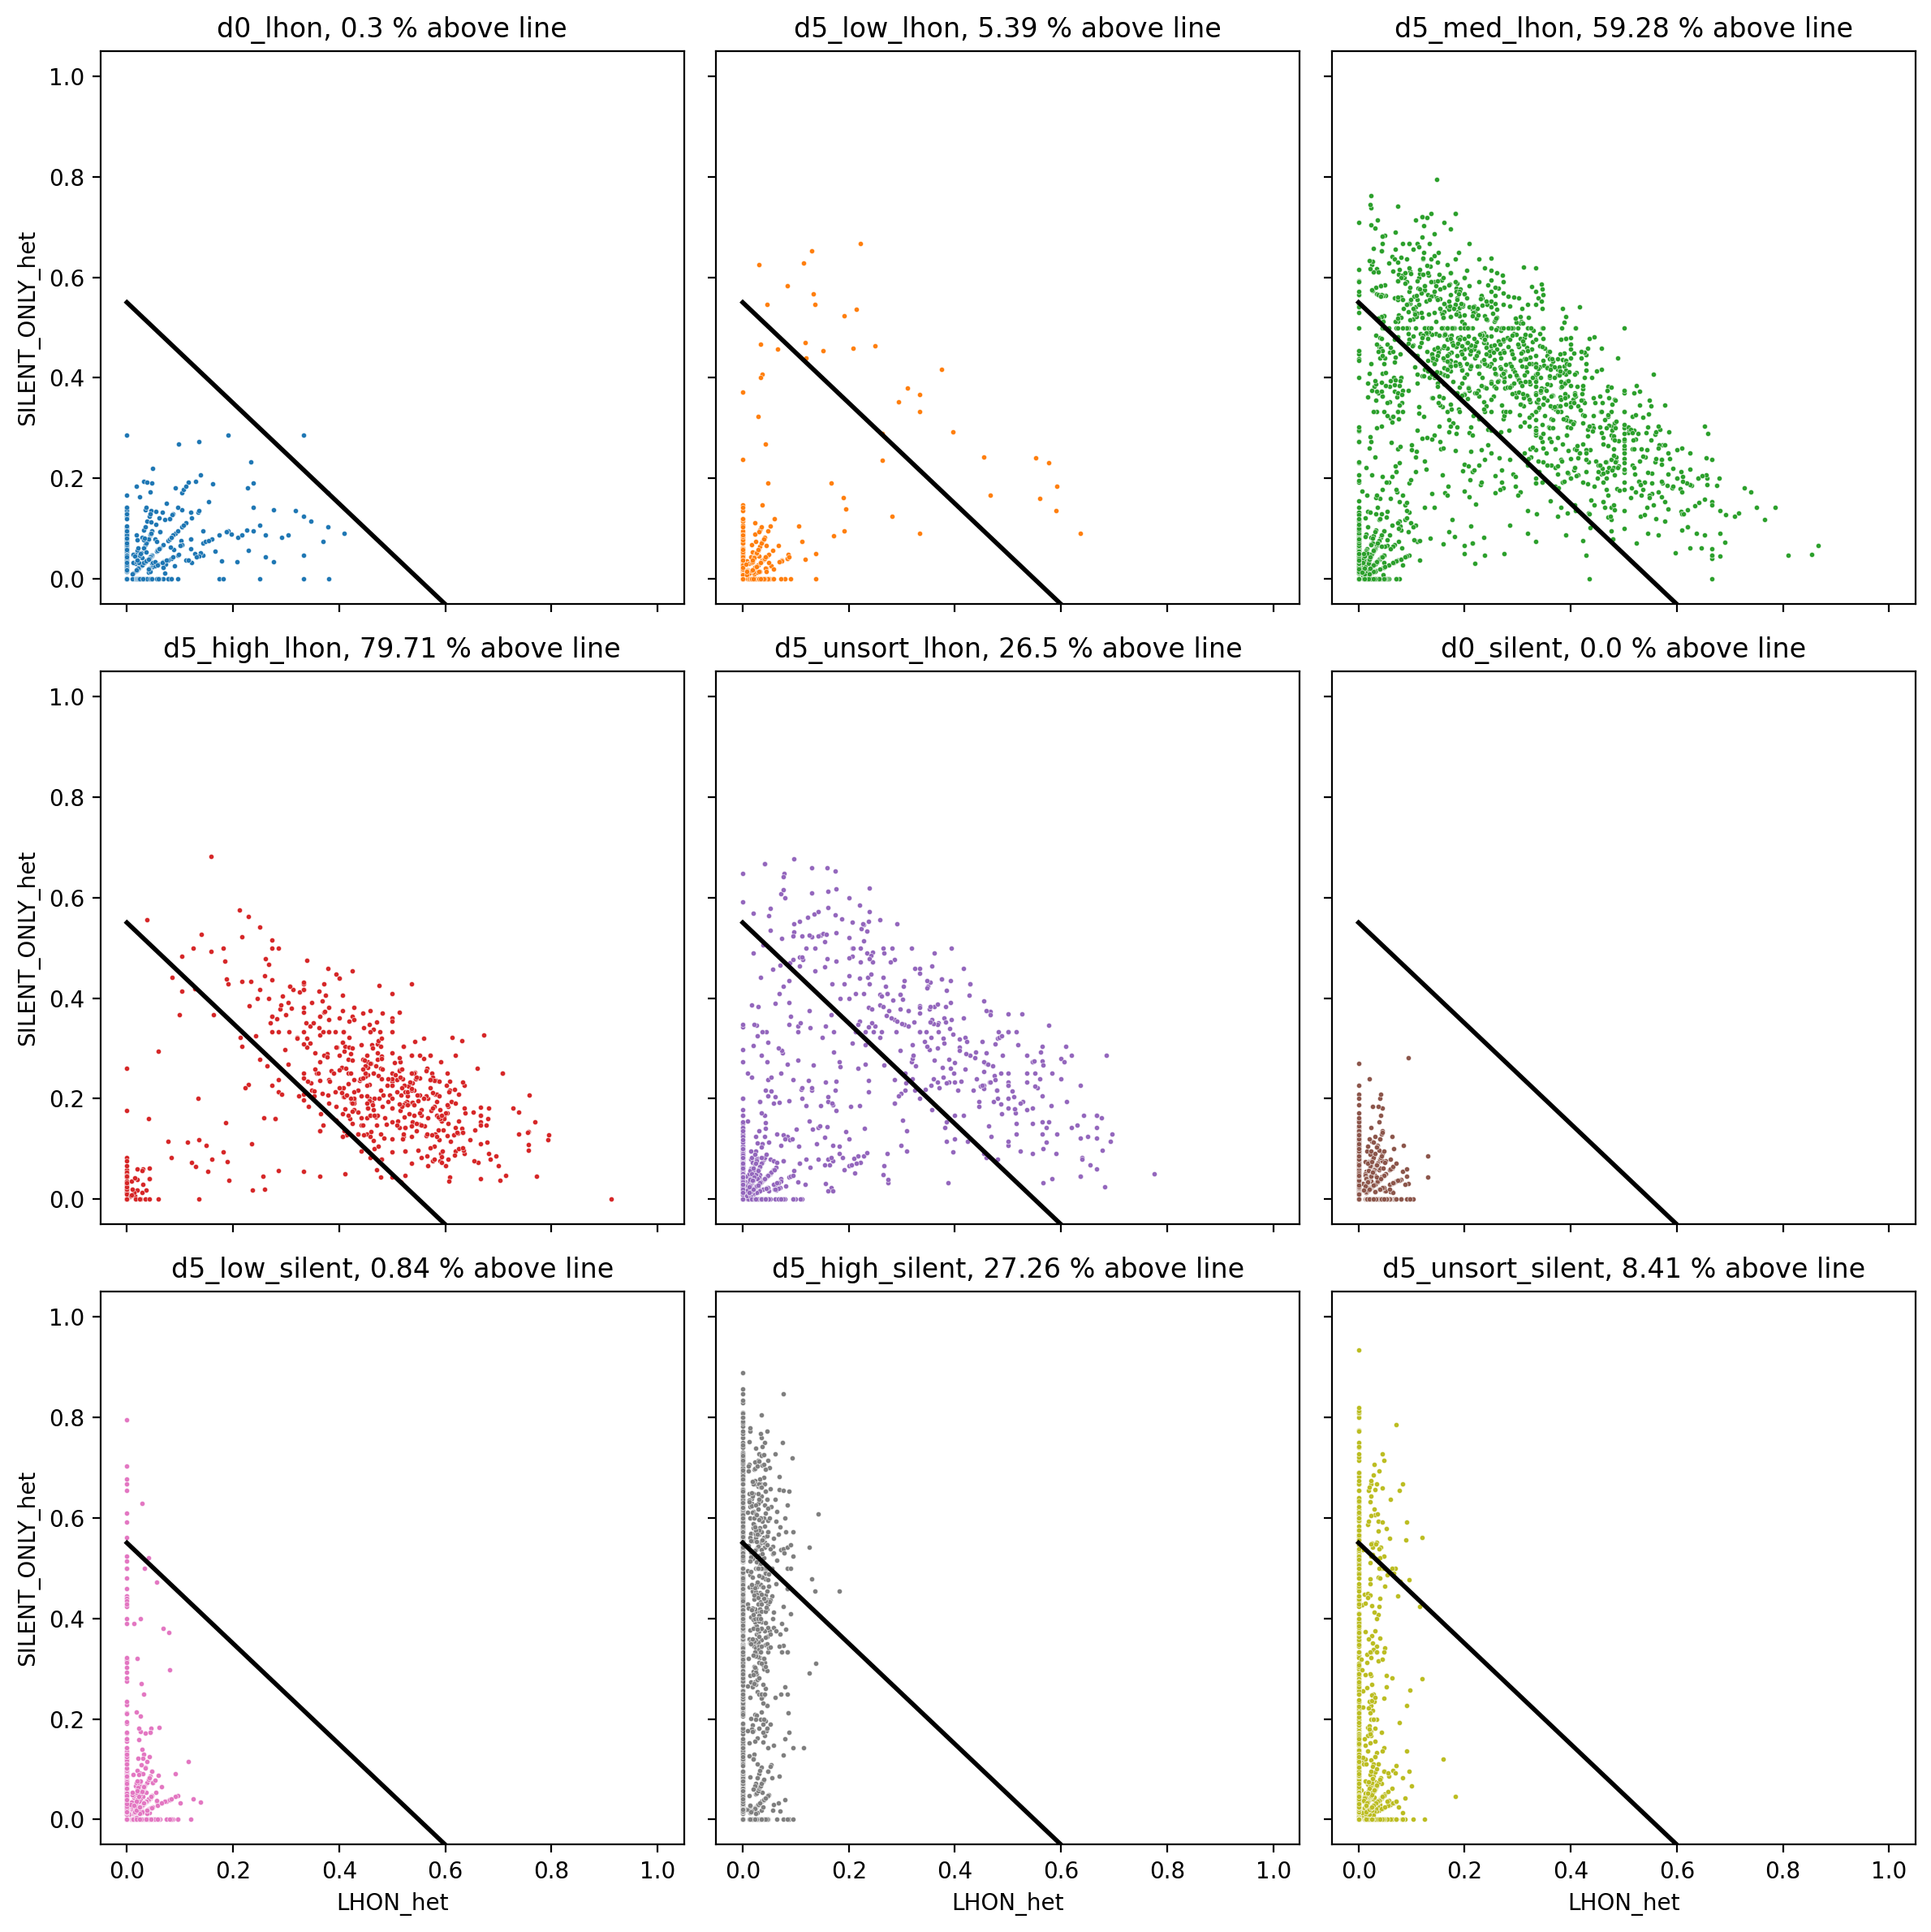

In [25]:
fig, axes = pyplot.subplots(nrows=3, ncols=3, figsize=(12,12), sharey=True, sharex=True)
xorder = ['d0_lhon', 'd5_low_lhon', 'd5_med_lhon', 'd5_high_lhon', 'd5_unsort_lhon', 
          'd0_silent', 'd5_low_silent', 'd5_high_silent', 'd5_unsort_silent']
for idx, cond in enumerate(xorder):
    ax_idx = (idx//3, idx%3)
    to_plot_subset = valid_cells.loc[valid_cells['condition_no_rep'] == cond]
    seaborn.scatterplot(data=to_plot_subset, x='LHON_het', y='SILENT_ONLY_het', 
                        color=f'C{idx}', s=5, ax=axes[ax_idx])
    xvals = numpy.arange(0,0.8,0.05)
    yvals = -1*xvals + 0.55
    above_line = [(-1*l_het + 0.55) < s_het 
                  for l_het, s_het in to_plot_subset[['LHON_het', 'SILENT_ONLY_het']].to_numpy()]
    pct_above = round((numpy.sum(above_line)/len(above_line))*100, 2)
    axes[ax_idx].plot(xvals, yvals, color='k', linewidth=2)
    axes[ax_idx].set_xlim((-0.05, 1.05))
    axes[ax_idx].set_ylim((-0.05, 1.05))
    axes[ax_idx].set_title(f'{cond}, {pct_above} % above line')
fig.tight_layout()

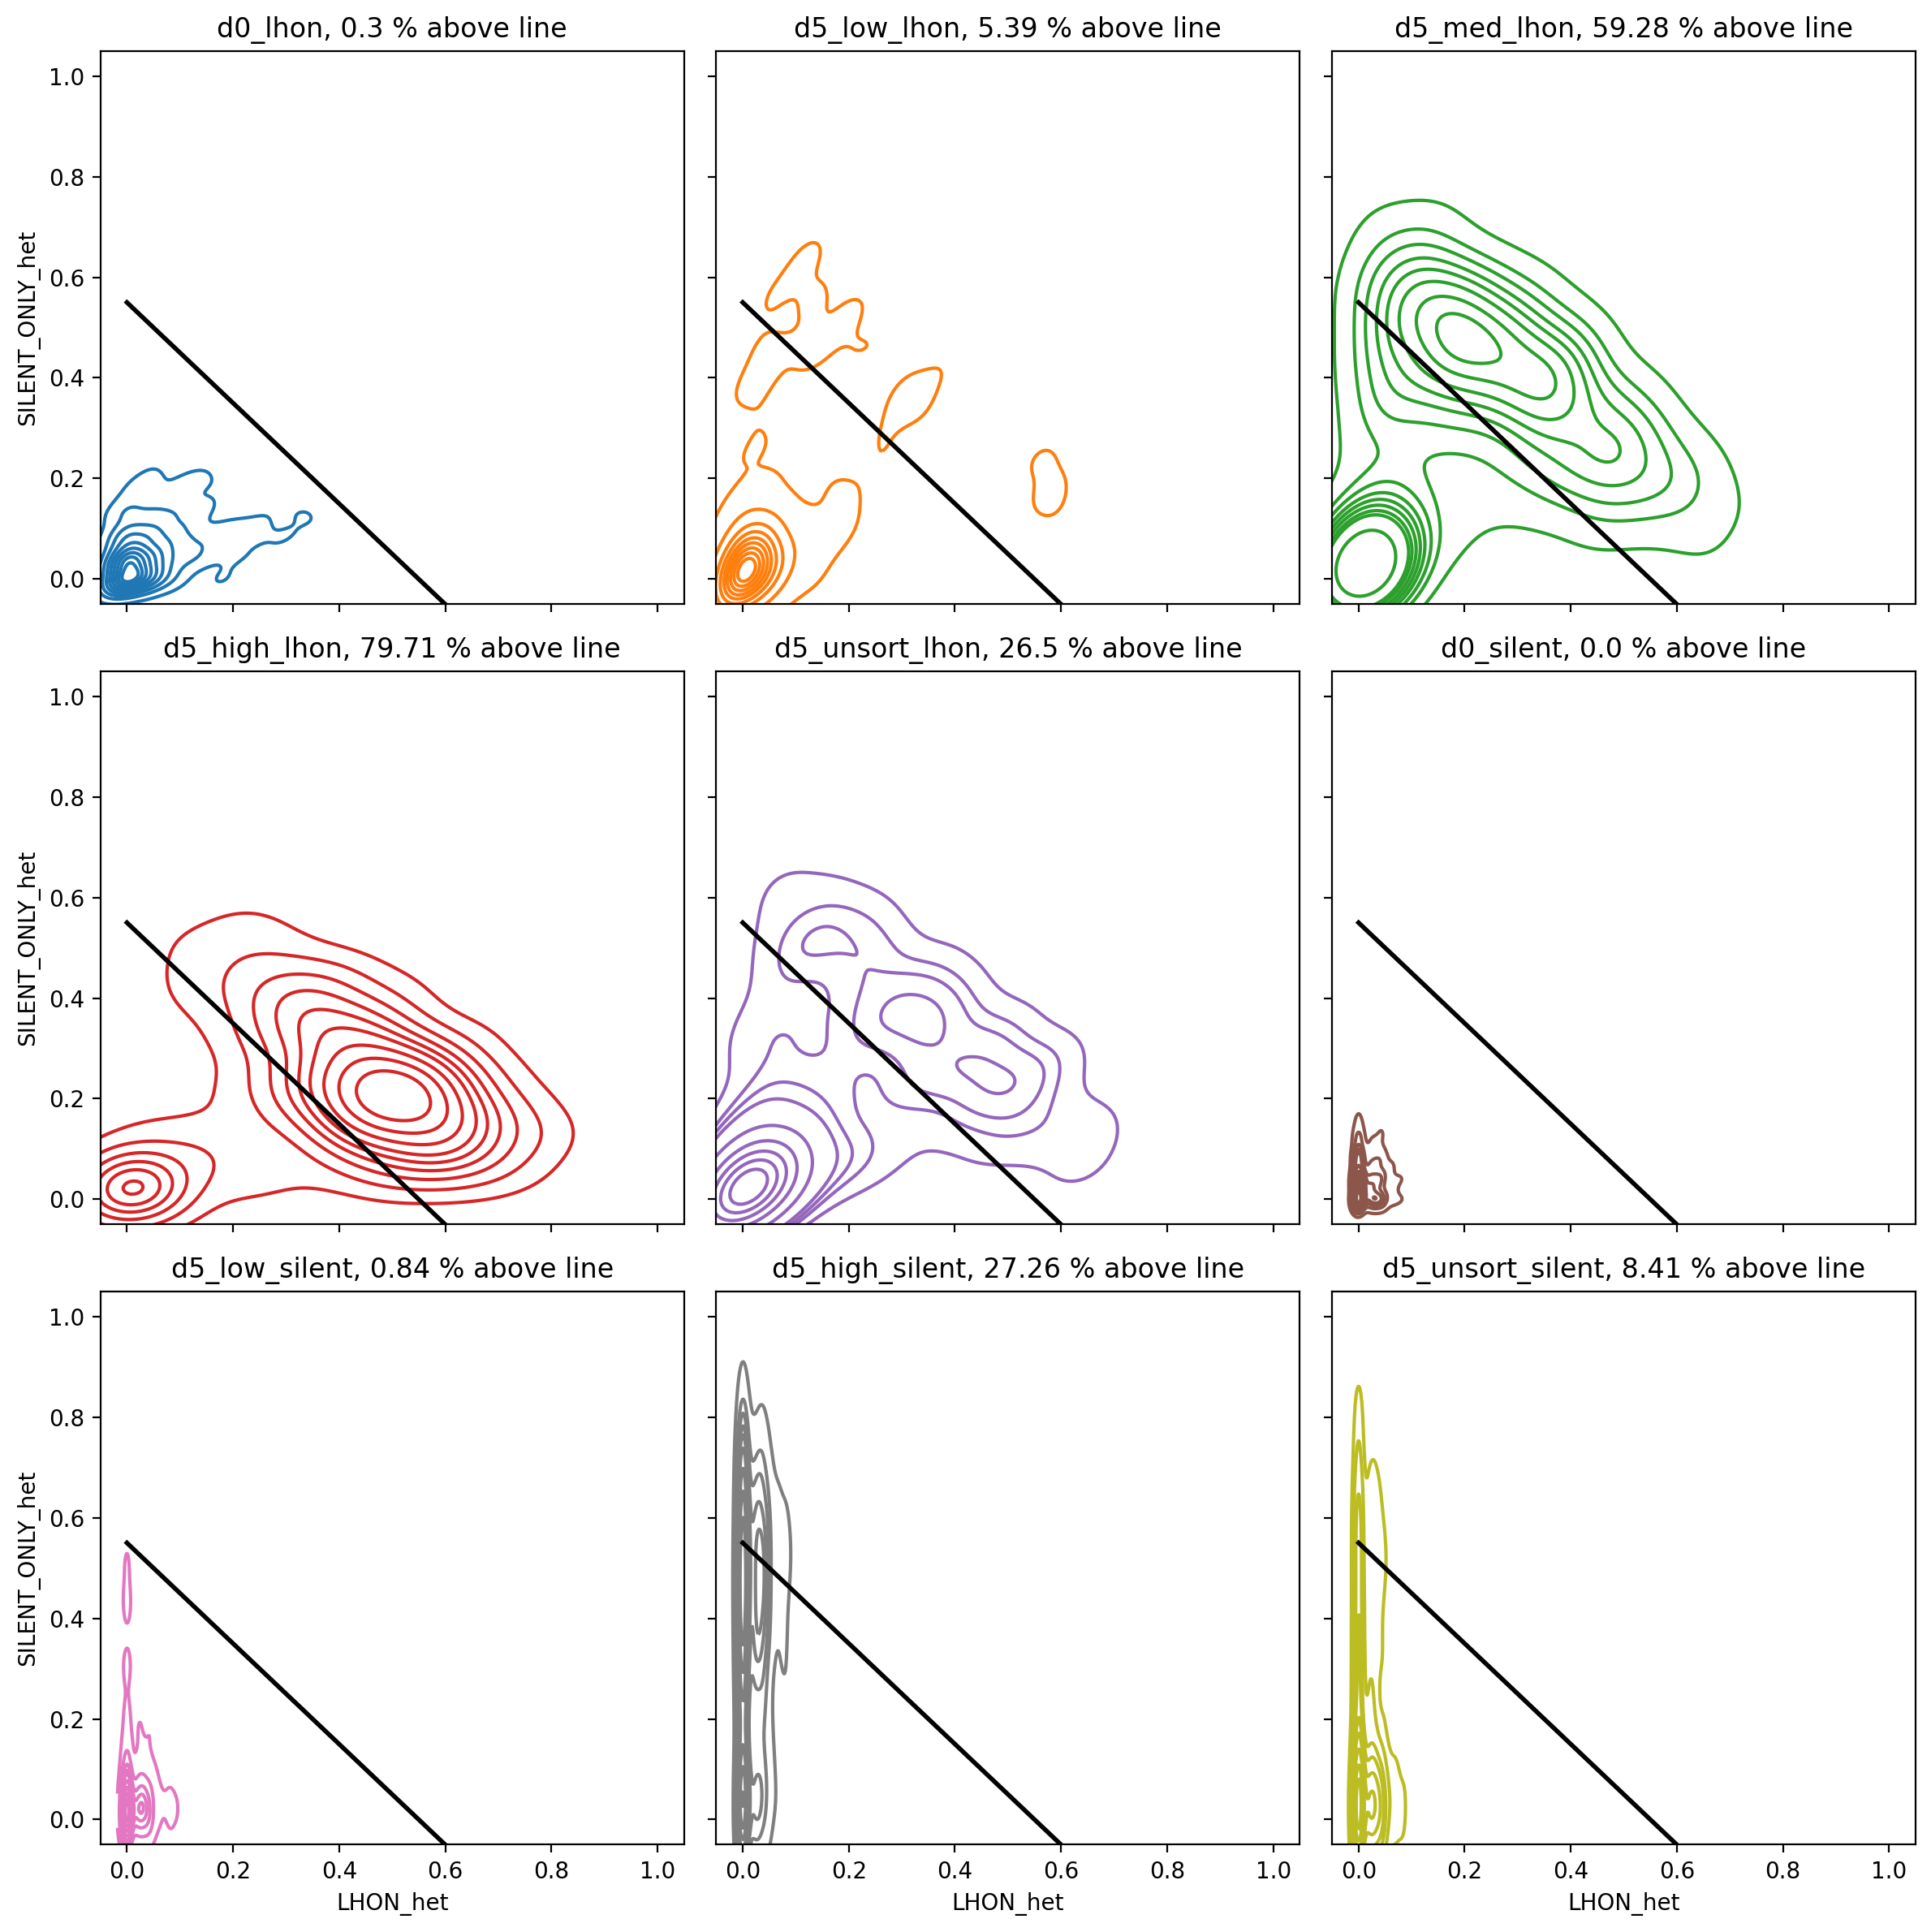

In [26]:
fig, axes = pyplot.subplots(nrows=3, ncols=3, figsize=(12,12), sharey=True, sharex=True)
xorder = ['d0_lhon', 'd5_low_lhon', 'd5_med_lhon', 'd5_high_lhon', 'd5_unsort_lhon', 
          'd0_silent', 'd5_low_silent', 'd5_high_silent', 'd5_unsort_silent']
for idx, cond in enumerate(xorder):
    ax_idx = (idx//3, idx%3)
    to_plot_subset = valid_cells.loc[valid_cells['condition_no_rep'] == cond]
    seaborn.kdeplot(data=to_plot_subset, x='LHON_het', y='SILENT_ONLY_het', 
                    color=f'C{idx}', ax=axes[ax_idx])
    xvals = numpy.arange(0,0.8,0.05)
    yvals = -1*xvals + 0.55
    above_line = [(-1*l_het + 0.55) < s_het 
                  for l_het, s_het in to_plot_subset[['LHON_het', 'SILENT_ONLY_het']].to_numpy()]
    pct_above = round((numpy.sum(above_line)/len(above_line))*100, 2)
    axes[ax_idx].plot(xvals, yvals, color='k', linewidth=2)
    axes[ax_idx].set_xlim((-0.05, 1.05))
    axes[ax_idx].set_ylim((-0.05, 1.05))
    axes[ax_idx].set_title(f'{cond}, {pct_above} % above line')
fig.tight_layout()

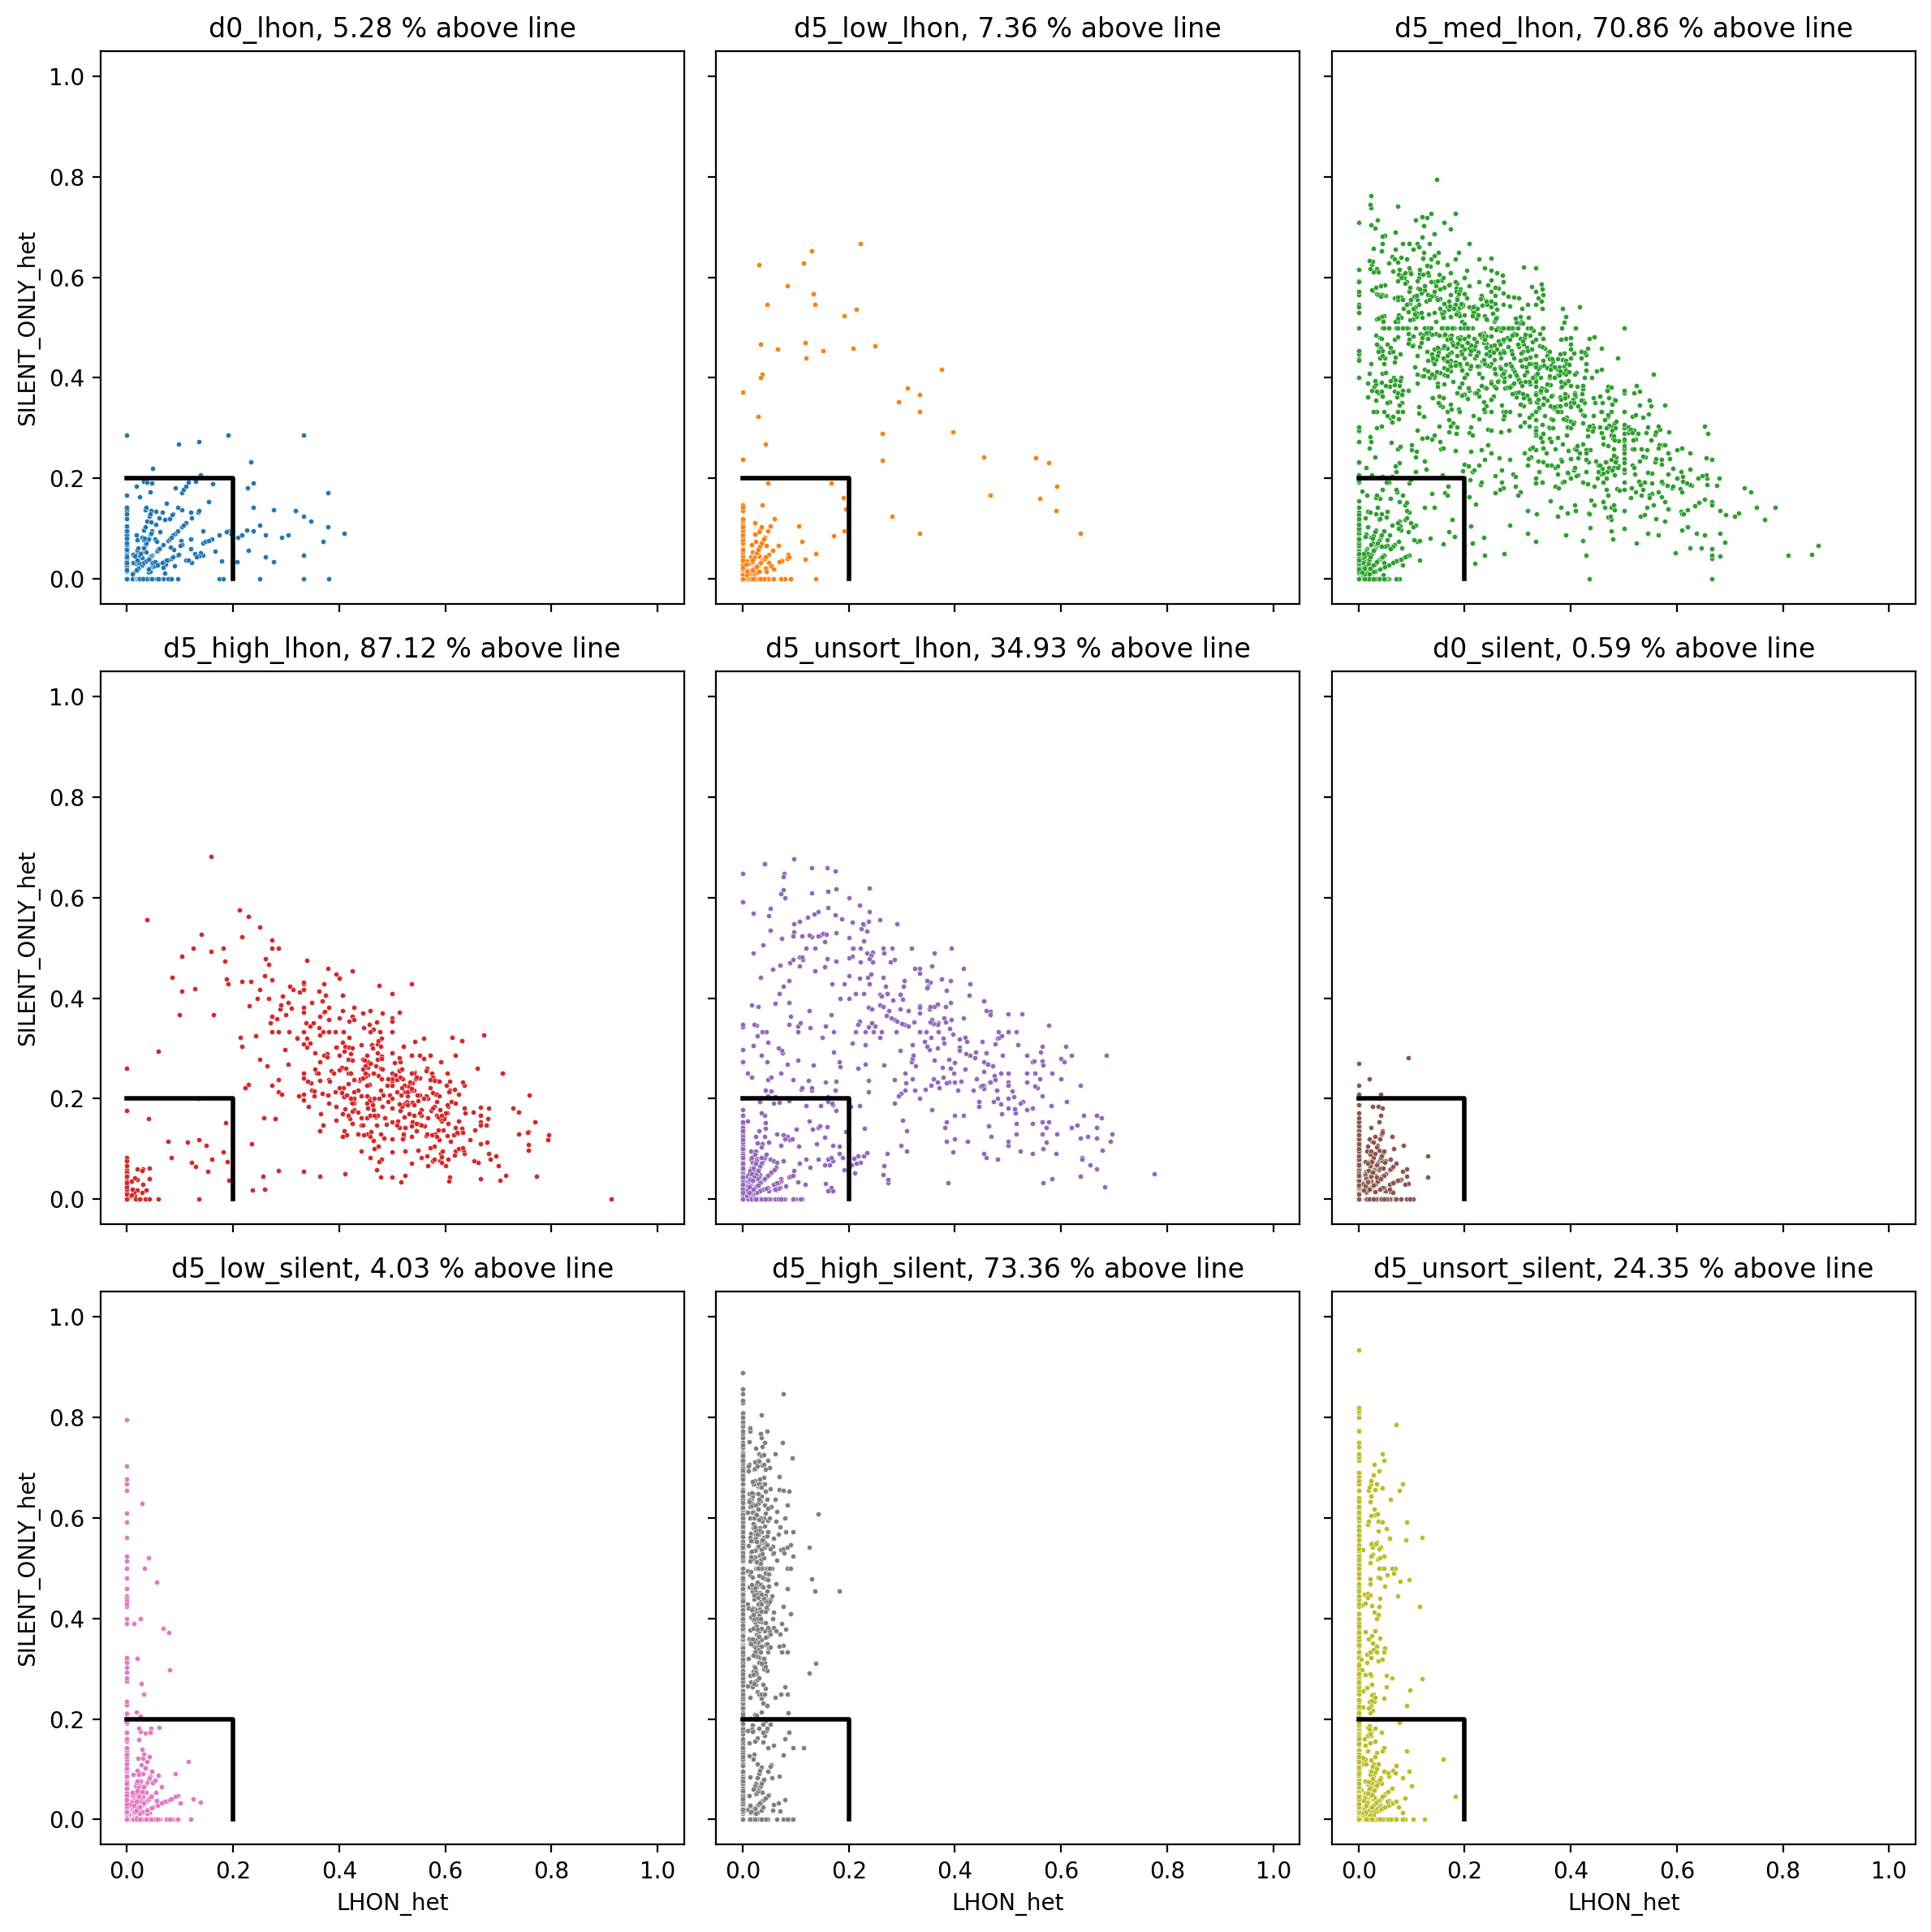

In [27]:
fig, axes = pyplot.subplots(nrows=3, ncols=3, figsize=(12,12), sharey=True, sharex=True)
xorder = ['d0_lhon', 'd5_low_lhon', 'd5_med_lhon', 'd5_high_lhon', 'd5_unsort_lhon', 
          'd0_silent', 'd5_low_silent', 'd5_high_silent', 'd5_unsort_silent']
for idx, cond in enumerate(xorder):
    ax_idx = (idx//3, idx%3)
    to_plot_subset = valid_cells.loc[valid_cells['condition_no_rep'] == cond]
    seaborn.scatterplot(data=to_plot_subset, x='LHON_het', y='SILENT_ONLY_het', 
                        color=f'C{idx}', s=5, ax=axes[ax_idx])
    xvals = [0,0.2,0.2]
    yvals = [0.2, 0.2, 0]
    above_line = [(s_het > 0.2) or (l_het > 0.2) 
                  for l_het, s_het in to_plot_subset[['LHON_het', 'SILENT_ONLY_het']].to_numpy()]
    pct_above = round((numpy.sum(above_line)/len(above_line))*100, 2)
    axes[ax_idx].plot(xvals, yvals, color='k', linewidth=2)
    axes[ax_idx].set_xlim((-0.05, 1.05))
    axes[ax_idx].set_ylim((-0.05, 1.05))
    axes[ax_idx].set_title(f'{cond}, {pct_above} % above line')
fig.tight_layout()

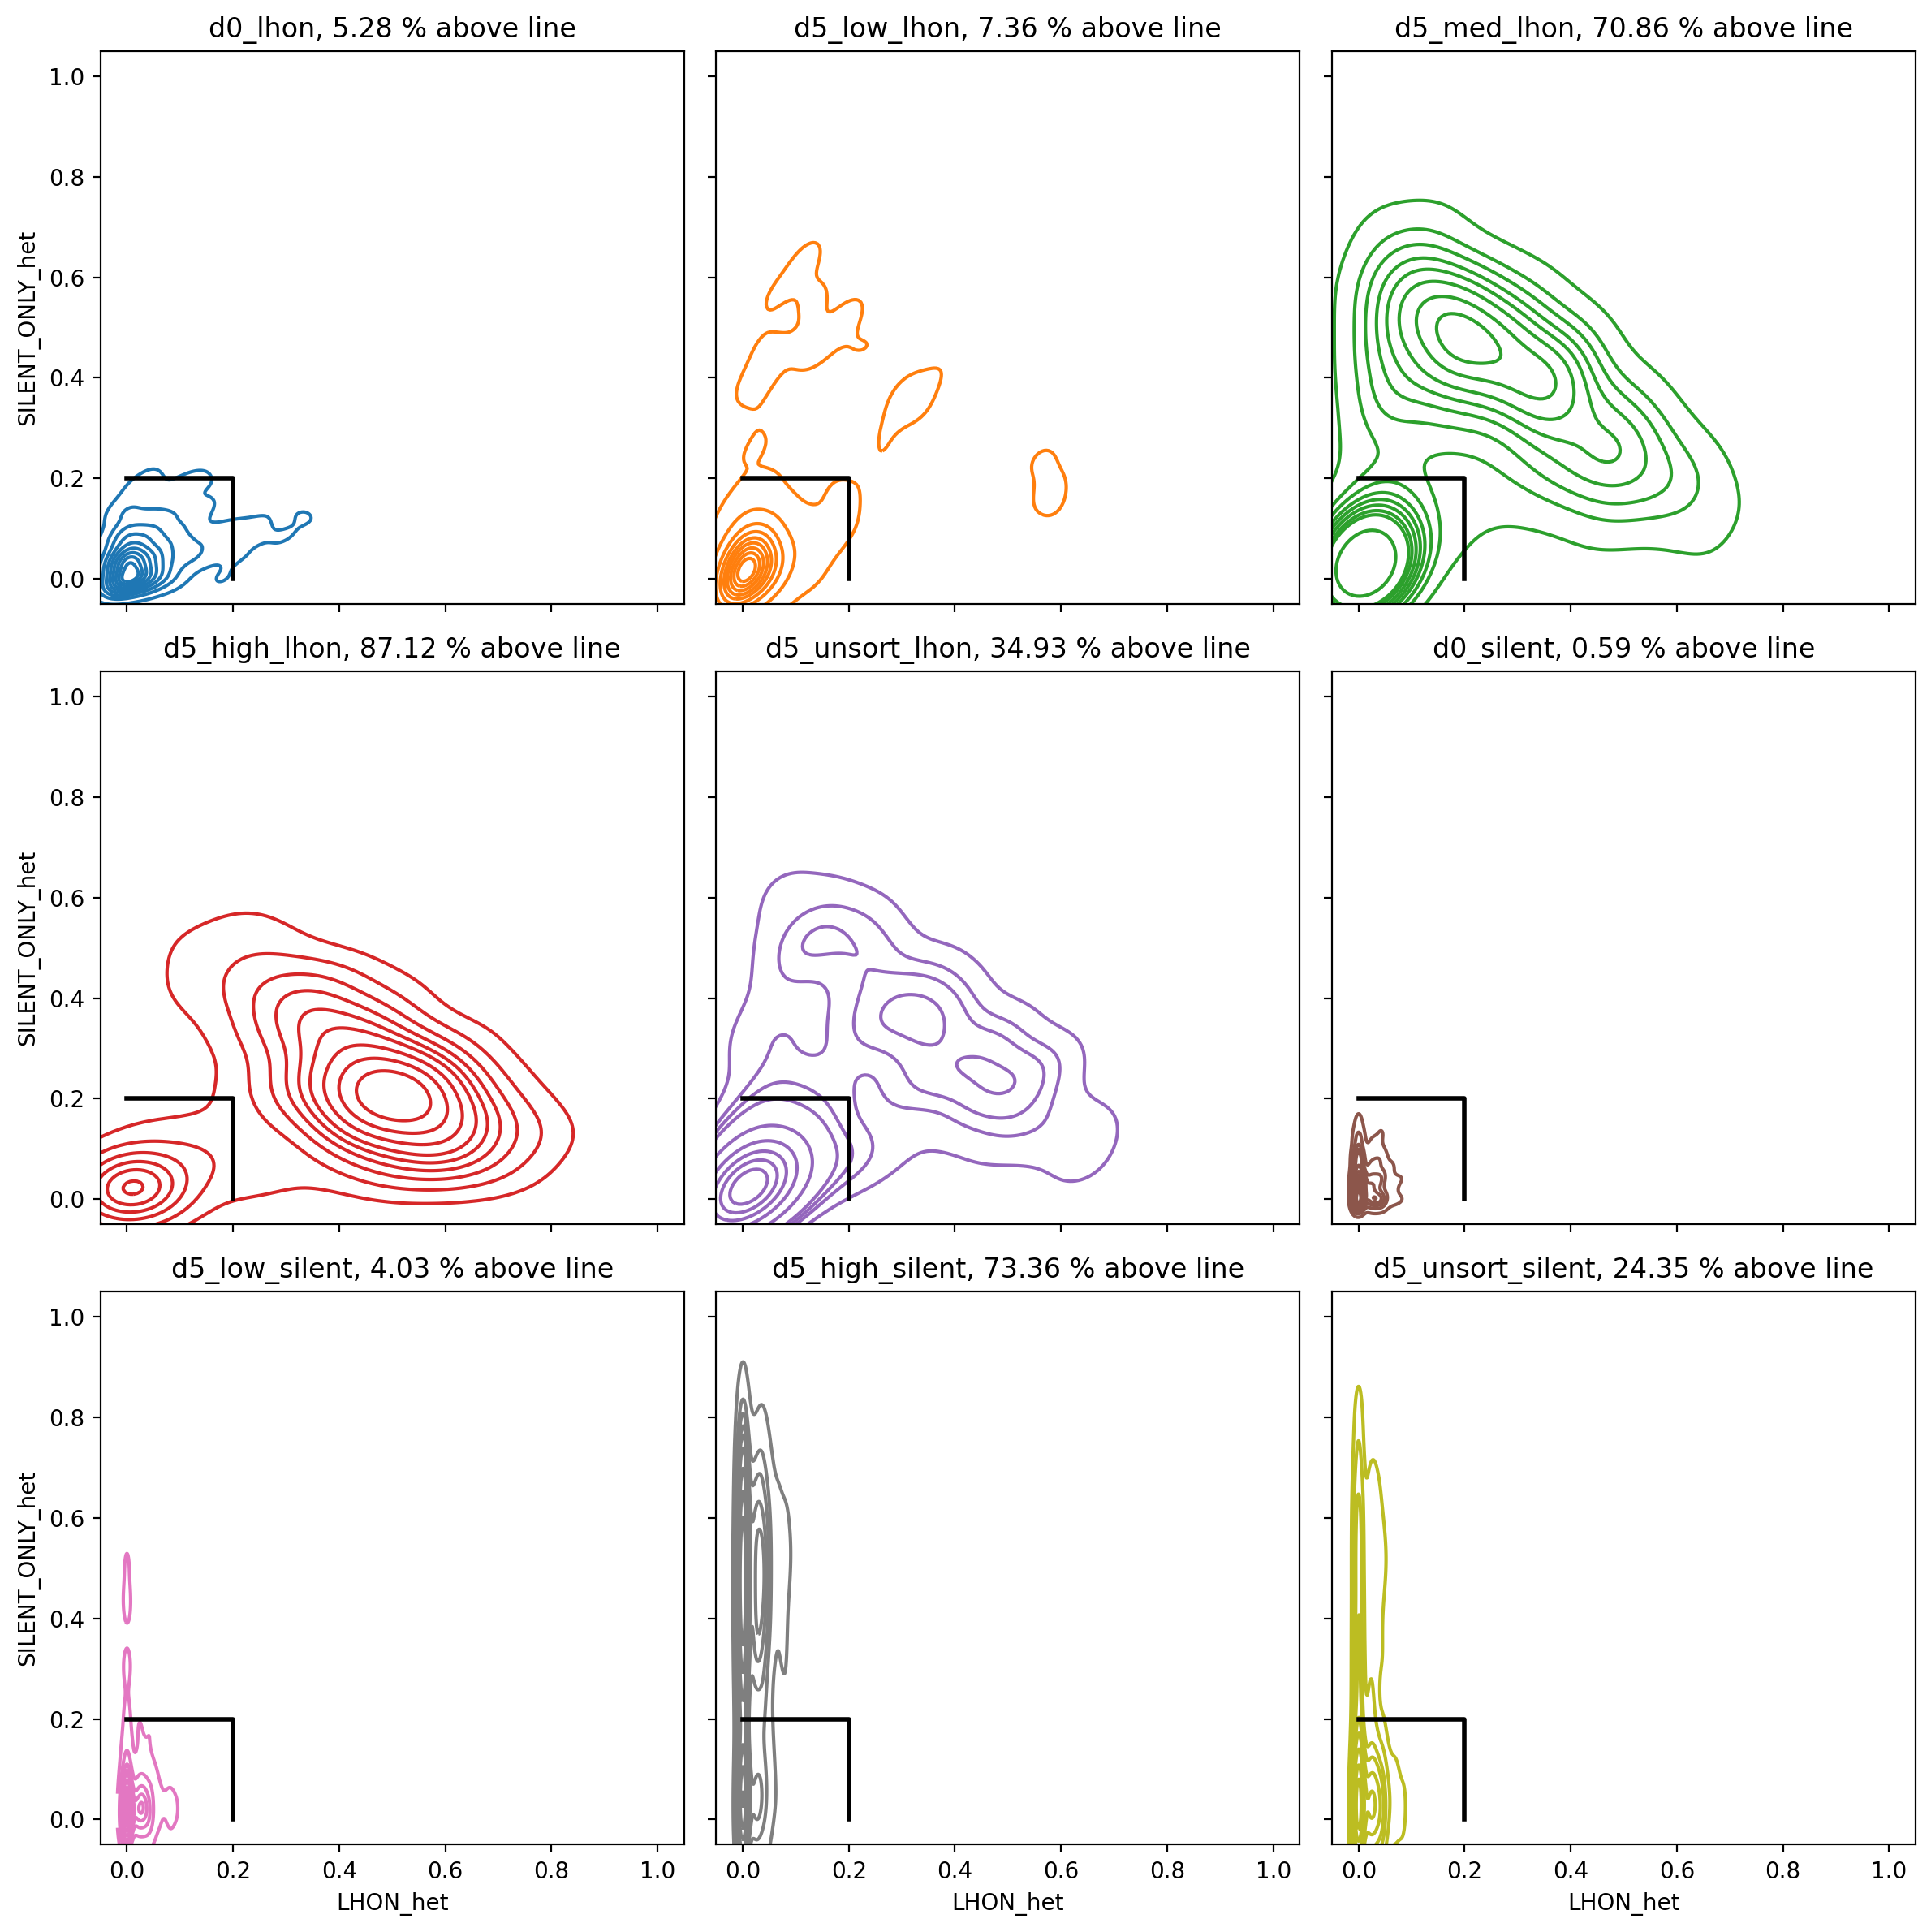

In [28]:
fig, axes = pyplot.subplots(nrows=3, ncols=3, figsize=(12,12), sharey=True, sharex=True)
xorder = ['d0_lhon', 'd5_low_lhon', 'd5_med_lhon', 'd5_high_lhon', 'd5_unsort_lhon', 
          'd0_silent', 'd5_low_silent', 'd5_high_silent', 'd5_unsort_silent']
for idx, cond in enumerate(xorder):
    ax_idx = (idx//3, idx%3)
    to_plot_subset = valid_cells.loc[valid_cells['condition_no_rep'] == cond]
    seaborn.kdeplot(data=to_plot_subset, x='LHON_het', y='SILENT_ONLY_het', 
                    color=f'C{idx}', ax=axes[ax_idx])
    xvals = [0,0.2,0.2]
    yvals = [0.2, 0.2, 0]
    above_line = [(s_het > 0.2) or (l_het > 0.2) 
                  for l_het, s_het in to_plot_subset[['LHON_het', 'SILENT_ONLY_het']].to_numpy()]
    pct_above = round((numpy.sum(above_line)/len(above_line))*100, 2)
    axes[ax_idx].plot(xvals, yvals, color='k', linewidth=2)
    axes[ax_idx].set_xlim((-0.05, 1.05))
    axes[ax_idx].set_ylim((-0.05, 1.05))
    axes[ax_idx].set_title(f'{cond}, {pct_above} % above line')
fig.tight_layout()